In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import missingno as msno

In [2]:
#Reading dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Graphs

In [7]:
df=train.copy()

In [8]:
#Dropping columns which contains many nulls
drop_list=['MiscFeature','Fence','PoolQC','Alley','FireplaceQu','Id']
df.drop(drop_list,axis=1,inplace=True)

In [9]:
#Function for changing names of values in columns based on amount
def change(col,l):
    df[col]=df[col].replace(l,'Others')

In [10]:
#Processes in different columns
def others(df):
    change('MSZoning',['FV', 'RH', 'C (all)'])
    change('LotConfig',['FR2', 'FR3', 'CulDSac'])
    change('Neighborhood',['Blueste','NPkVill'])
    change('Condition1',['RRNn','RRNe'])
    change('HouseStyle',['1.5Unf','2.5Unf','2.5Fin'])
    change('RoofStyle',['Shed','Mansard','Gambrel','Flat'])
    change('RoofMatl',['Membran','ClyTile','Roll','Metal']) 
    change('Exterior1st',['BrkComm','Stone','AsphShn','CBlock','ImStucc']) 
    change('Exterior2nd',['AsphShn','Other','CBlock'])
    df['MasVnrType'].fillna('Unknown' ,inplace=True)  
    df['MasVnrArea'].fillna(round(df['MasVnrArea'].mean()) ,inplace=True)  
    df['LotFrontage'].fillna(round(df['LotFrontage'].mean()) ,inplace=True)  
    change('ExterQual',['Ex','Fa'])
    change('ExterCond',['Ex','Po','Fa'])
    change('Foundation',['Slab','Stone','Wood'])
    df['BsmtQual'].fillna('Unknown' ,inplace=True) 
    df['BsmtExposure'].fillna('Unknown' ,inplace=True)  
    df['BsmtFinType1'].fillna('Unknown' ,inplace=True) 
    df['BsmtFinType2'].fillna('Unknown' ,inplace=True)   
    df['BsmtFinType2'].fillna('Unknown' ,inplace=True)   
    change('Heating',['Grav','Wall','OthW','Floor'])
    change('HeatingQC',['Fa','Po'])
    change('Electrical',['FuseP','Mix'])
    change('KitchenQual',['Ex','Fa'])
    change('Functional',['Maj2','Sev'])
    df['GarageType'].fillna('Unknown' ,inplace=True)   
    change('GarageQual',['Ex','Po'])
    df['GarageQual'].fillna('Unknown' ,inplace=True)   
    change('GarageCond',['Ex','Po','Gd'])
    df['GarageCond'].fillna('Unknown' ,inplace=True)   
    change('SaleType',['ConLD','ConLI','ConLw','CWD','Oth','Con'])
    change('SaleCondition',['Alloca','AdjLand'])
others(df)

In [11]:
#Functions to display bar plots
def bar_plot_series(x,y,title,size=(6,4),hue_col=None):
    plt.figure(figsize=size) 
    plt.title(title, fontsize=19)
    sns.barplot(x,y,hue=hue_col)
    
def bar_count(col,title,size=(6,4),hue_col=None):
    df1=df[col].value_counts().sort_values(ascending=False)
    bar_plot_series(df1.index,df1.values,title,size,hue_col)

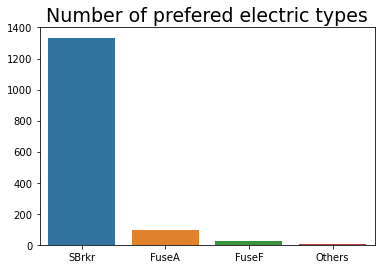

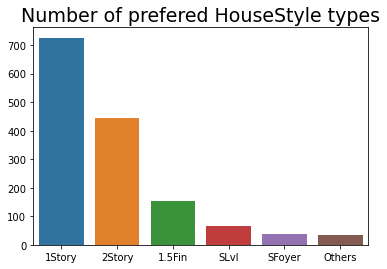

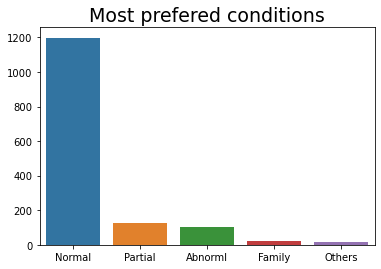

In [12]:
bar_count('Electrical', 'Number of prefered electric types')
bar_count('HouseStyle', 'Number of prefered HouseStyle types')
bar_count('SaleCondition', 'Most prefered conditions')

In [13]:
#Function that groups by column displaying average price
def mean_groupby(col,title,size=(6,4)):
    df1=df.groupby(col)['SalePrice'].mean().sort_values(ascending=False) 
    bar_plot_series(df1.index,df1.values,title,size)

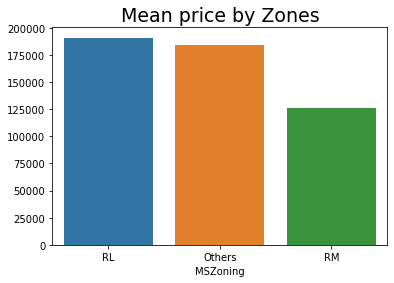

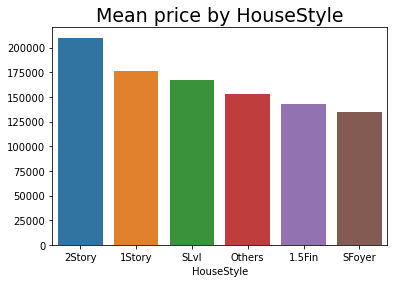

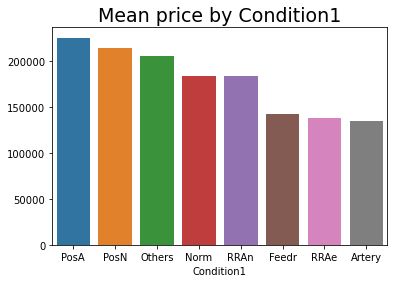

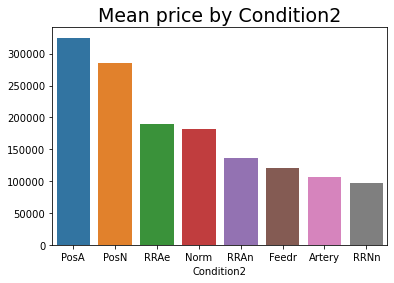

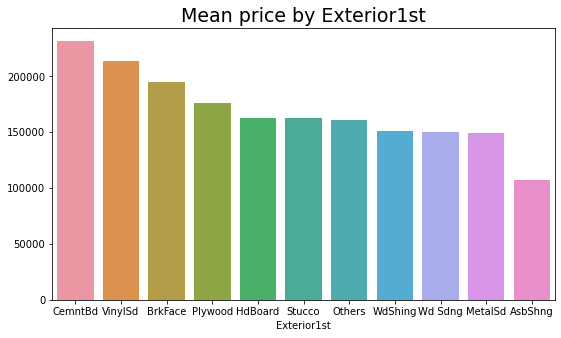

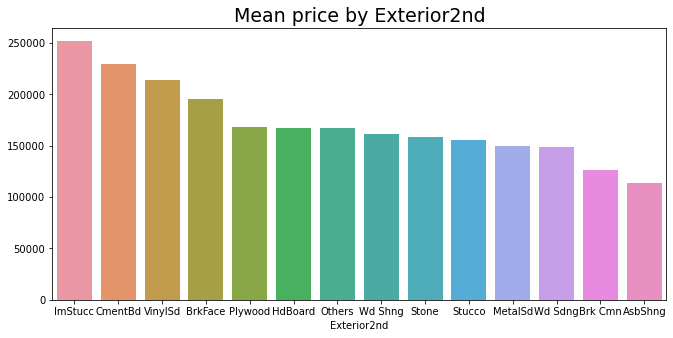

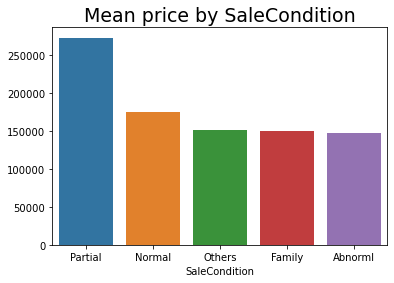

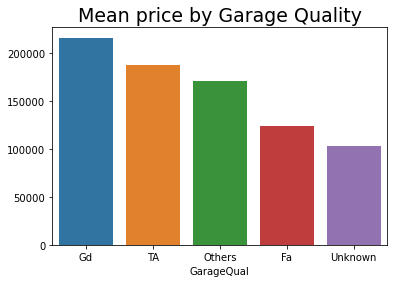

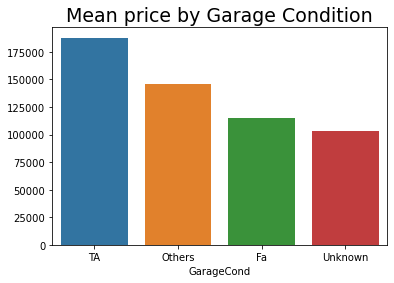

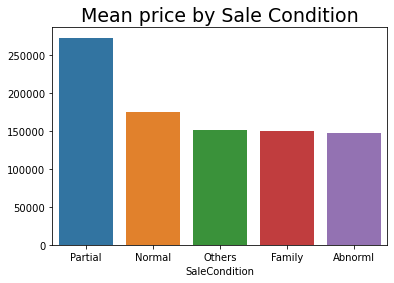

In [14]:
mean_groupby('MSZoning','Mean price by Zones')
mean_groupby('HouseStyle','Mean price by HouseStyle')
mean_groupby('Condition1','Mean price by Condition1')
mean_groupby('Condition2','Mean price by Condition2')
mean_groupby('Exterior1st','Mean price by Exterior1st',(9,5))
mean_groupby('Exterior2nd','Mean price by Exterior2nd',(11,5))
mean_groupby('SaleCondition','Mean price by SaleCondition')
mean_groupby('GarageQual','Mean price by Garage Quality')##
mean_groupby('GarageCond','Mean price by Garage Condition')##
mean_groupby('SaleCondition','Mean price by Sale Condition')##

In [15]:
def plot(col,title,size=(8,5)):
    df1=df[col].value_counts().sort_index()
    plt.figure(figsize=size) 
    plt.title(title, fontsize=19) 
    plt.plot(df1.index,df1.values)

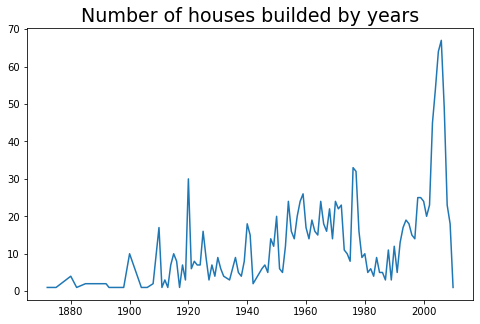

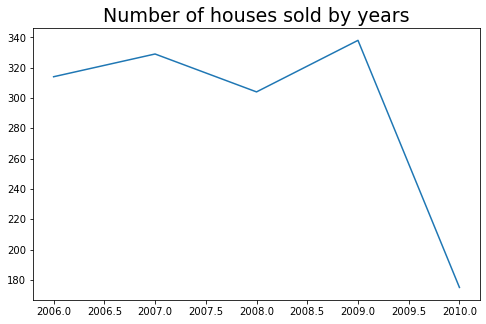

In [16]:
plot('YearBuilt','Number of houses builded by years')
plot('YrSold','Number of houses sold by years')

In [17]:
def plot_mean(col,title,size=(8,5)):
    df1=df.groupby(col)['SalePrice'].mean().sort_index()
    plt.figure(figsize=size) 
    plt.title(title, fontsize=19) 
    plt.plot(df1.index,df1.values)

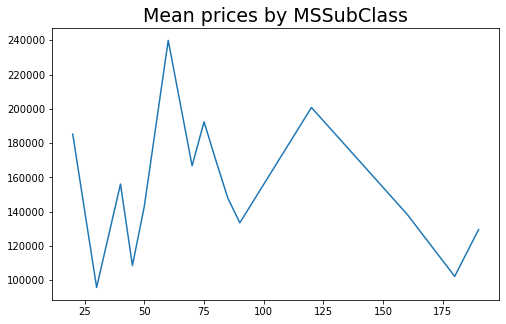

In [18]:
plot_mean('MSSubClass','Mean prices by MSSubClass')

In [19]:
def scatter(col,title,size=(8,5)):
    plt.figure(figsize=size)
    plt.title(title,fontsize=19)
    plt.scatter(df[col],df['SalePrice'],facecolors='none',edgecolors='black',s=12)

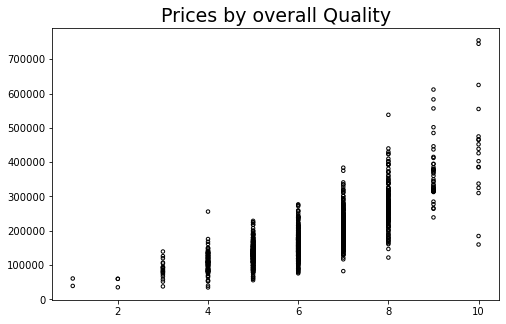

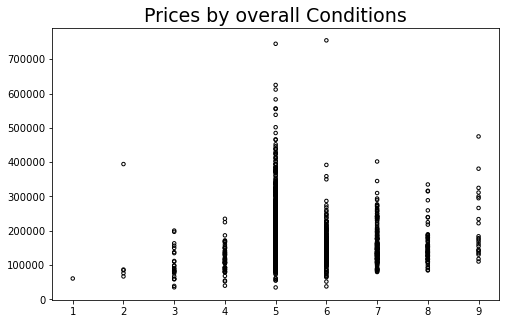

In [20]:
scatter('OverallQual','Prices by overall Quality')
scatter('OverallCond','Prices by overall Conditions')

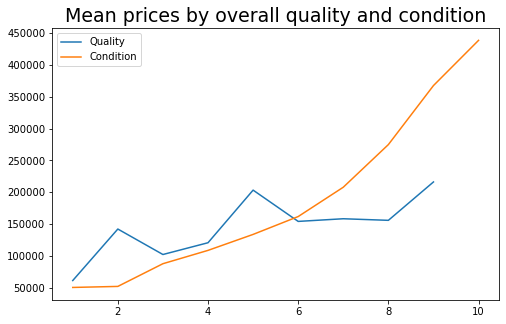

In [21]:
df2=df.groupby('OverallCond')['SalePrice'].mean().sort_index()
df3=df.groupby('OverallQual')['SalePrice'].mean().sort_index()
plt.figure(figsize=(8,5))
plt.title('Mean prices by overall quality and condition', fontsize=19)
plt.plot(df2.index,df2.values)
plt.plot(df3.index,df3.values)
plt.legend(['Quality','Condition'])
plt.show()

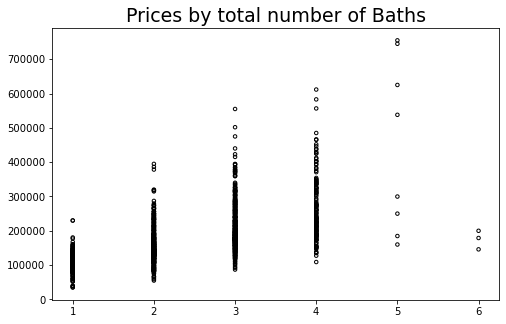

In [22]:
df4=df['BsmtFullBath']+df['BsmtHalfBath']+df['FullBath']+df['HalfBath']
plt.figure(figsize=(8,5))
plt.title('Prices by total number of Baths', fontsize=19)
plt.scatter(df4.values,train['SalePrice'], facecolors='none', edgecolors='black',s=12)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

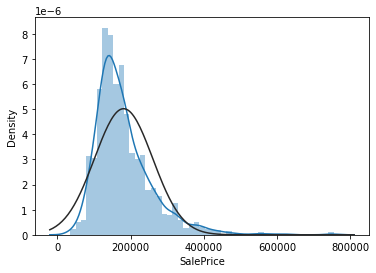

In [23]:
from scipy.stats import norm
sns.distplot(df['SalePrice'], fit=norm)

# Preprocessing

In [24]:
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)

In [25]:
SalePrice=train['SalePrice']

In [26]:
train1=train.drop('SalePrice', axis=1)

In [27]:
df=pd.concat([train1, test], keys=['x', 'y'], axis=0)

In [28]:
df.shape

(2919, 79)

In [29]:
df.head(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
  Id                                                                    
x 1           60       RL         65.0     8450   Pave   NaN      Reg   
  2           20       RL         80.0     9600   Pave   NaN      Reg   
  3           60       RL         68.0    11250   Pave   NaN      IR1   
  4           70       RL         60.0     9550   Pave   NaN      IR1   
  5           60       RL         84.0    14260   Pave   NaN      IR1   
  6           50       RL         85.0    14115   Pave   NaN      IR1   
  7           20       RL         75.0    10084   Pave   NaN      Reg   
  8           60       RL          NaN    10382   Pave   NaN      IR1   
  9           50       RM         51.0     6120   Pave   NaN      Reg   
  10         190       RL         50.0     7420   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
  Id                                  ...                                      
x 1          Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
  2          Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
  3          Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
  4          Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
  5          Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
  6          Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
  7          Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
  8          Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
  9          Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
  10         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
  Id                                                               
x 1          NaN       0       2    2008        WD         Normal  
  2          NaN       0       5    2007        WD         Normal  
  3          NaN       0       9    2008        WD         Normal  
  4          NaN       0       2    2006        WD        Abnorml  
  5          NaN       0      12    2008        WD         Normal  
  6         Shed     700      10    2009        WD         Normal  
  7          NaN       0       8    2007        WD         Normal  
  8         Shed     350      11    2009        WD         Normal  
  9          NaN       0       4    2008        WD        Abnorml  
  10         NaN       0       1    2008        WD         Normal  

[10 rows x 79 columns]

In [30]:
print("Total amount of Null values: {}".format(df.isnull().sum().sum()))

Total amount of Null values: 13965


In [31]:
nulls = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
nulls[nulls > 0]

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtExposure    0.028092
BsmtCond        0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
Functional      0.000685
BsmtHalfBath    0.000685
BsmtFullBath    0.000685
Utilities       0.000685
SaleType        0.000343
BsmtFinSF1      0.000343
KitchenQual     0.000343
GarageCars      0.000343
BsmtUnfSF       0.000343
TotalBsmtSF     0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
GarageArea      0.000343
Electrical      0.000343
BsmtFinSF2      0.000343
dtype: float64

In [32]:
#Dropping columns which contains a lot of null values
df=df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)

In [33]:
nulls = df.isnull().sum().sort_values(ascending=False)
nulls[nulls > 0]

LotFrontage     486
GarageQual      159
GarageYrBlt     159
GarageFinish    159
GarageCond      159
GarageType      157
BsmtExposure     82
BsmtCond         82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MasVnrArea       23
MSZoning          4
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
Utilities         2
GarageArea        1
BsmtFinSF2        1
BsmtFinSF1        1
GarageCars        1
TotalBsmtSF       1
SaleType          1
KitchenQual       1
Electrical        1
Exterior2nd       1
Exterior1st       1
BsmtUnfSF         1
dtype: int64

In [34]:
def fill_mode(dataframe,columns):
    for i in columns:
        dataframe[i]=dataframe[i].fillna(dataframe[i].value_counts().index[0])

In [35]:
fill_mode(df, ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond',
       'SaleType'])

In [36]:
nulls = df.isnull().sum()
n=nulls[nulls > 0]
n.index

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [37]:
for i in range(0,len(n.index)):
    print(n.index[i], df[n.index[i]].dtype)

LotFrontage float64
MasVnrArea float64
BsmtFinSF1 float64
BsmtFinSF2 float64
BsmtUnfSF float64
TotalBsmtSF float64
BsmtFullBath float64
BsmtHalfBath float64
GarageYrBlt float64
GarageCars float64
GarageArea float64


In [38]:
nulls = df.isnull().sum()
nulls[nulls > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [39]:
for col in df._get_numeric_data():
    df[col]=df[col].fillna(df[col].mean())

In [40]:
df.isnull().sum().sum()

0

# Outliers 

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.000000,70.0,190.0
LotFrontage,2919.0,69.305795,21.312345,21.0,60.0,69.305795,78.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.000000,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.000000,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.000000,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.000000,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.000000,2004.0,2010.0
MasVnrArea,2919.0,102.201312,178.626089,0.0,0.0,0.000000,163.5,1600.0
BsmtFinSF1,2919.0,441.423235,455.532750,0.0,0.0,369.000000,733.0,5644.0
BsmtFinSF2,2919.0,49.582248,169.176615,0.0,0.0,0.000000,0.0,1526.0


In [42]:
def thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    IQR = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * IQR
    low_limit = quartile1 - 1.5 * IQR
    dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
    dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    return dataframe

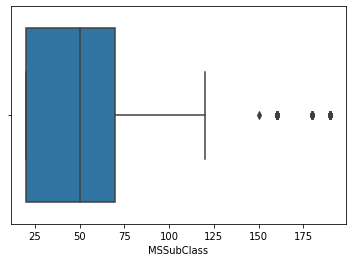

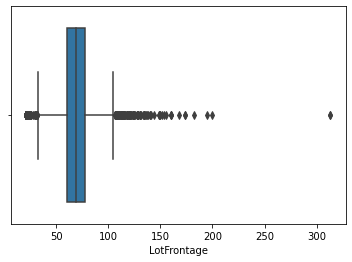

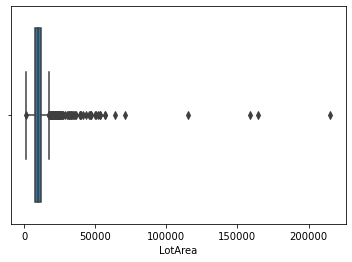

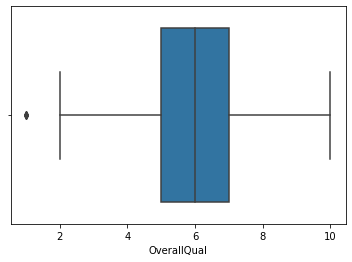

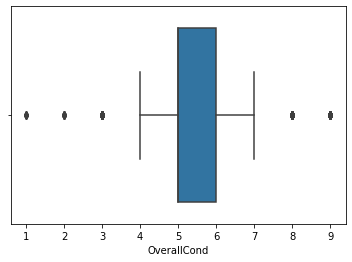

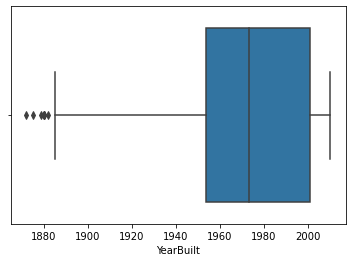

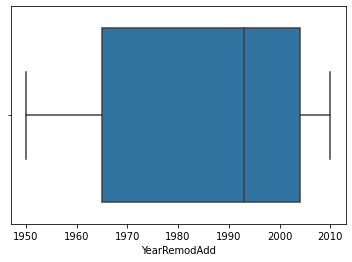

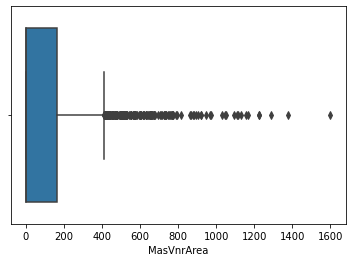

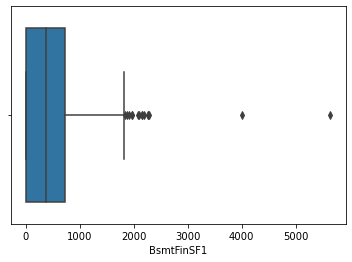

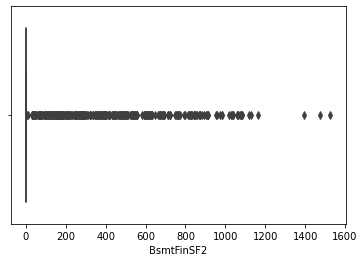

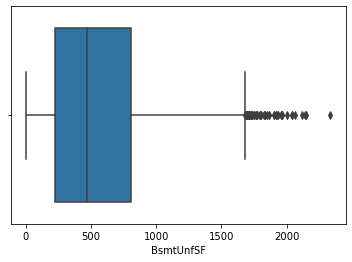

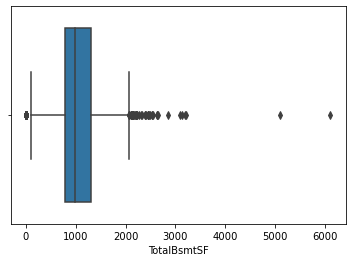

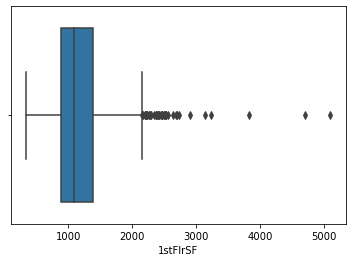

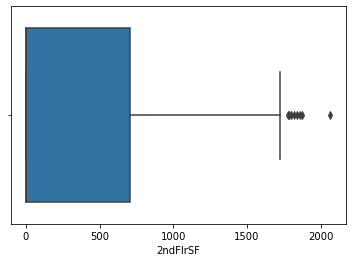

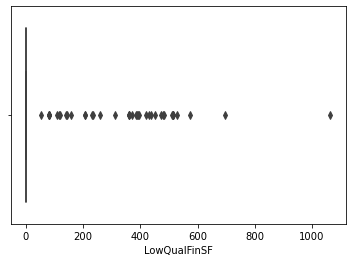

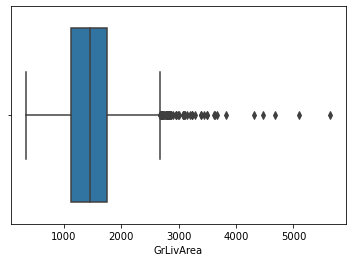

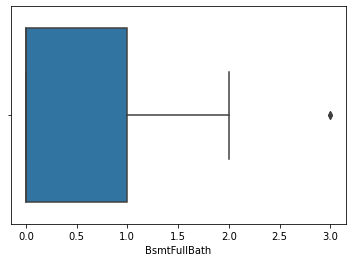

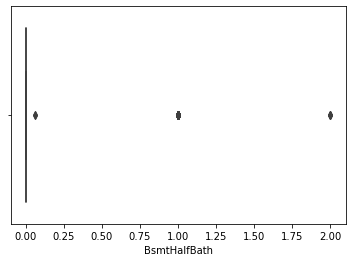

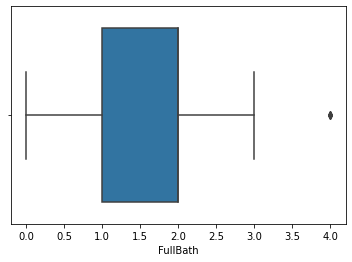

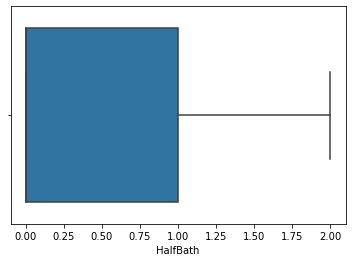

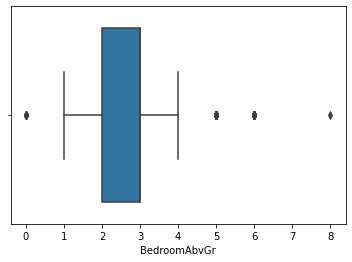

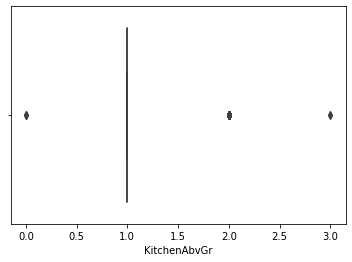

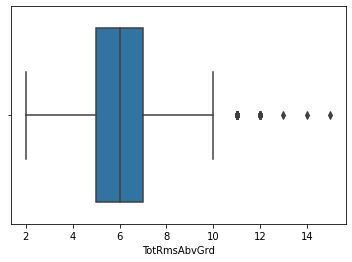

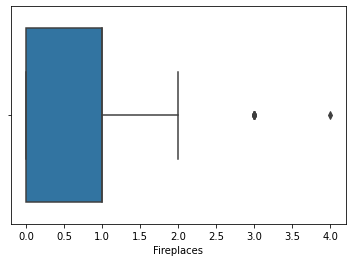

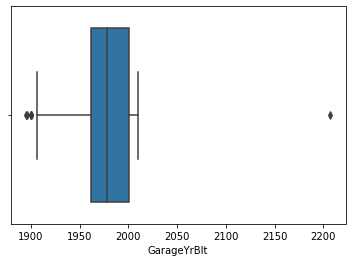

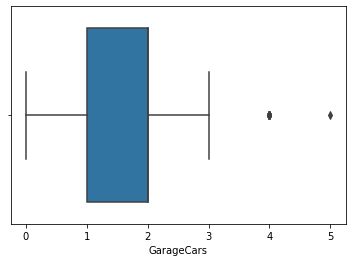

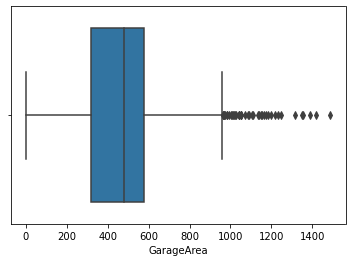

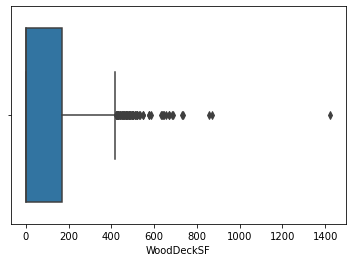

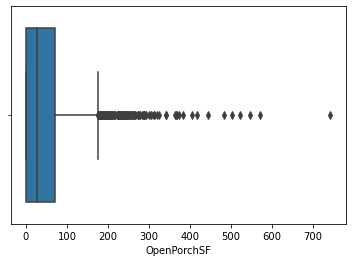

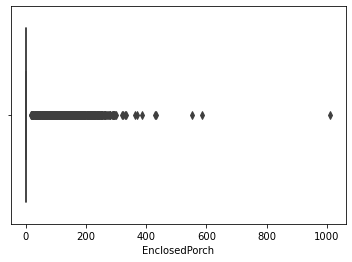

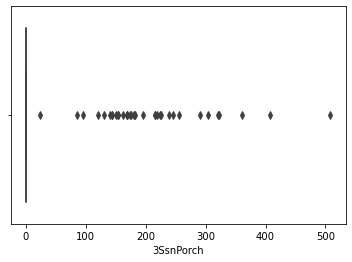

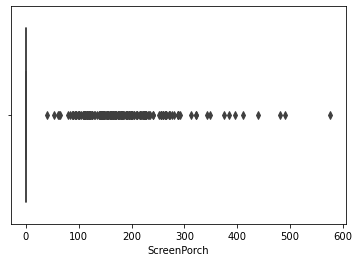

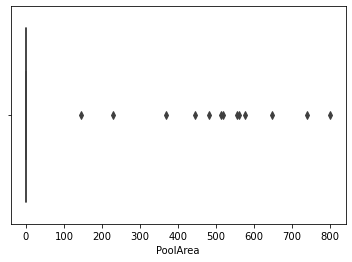

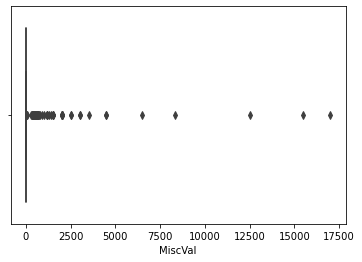

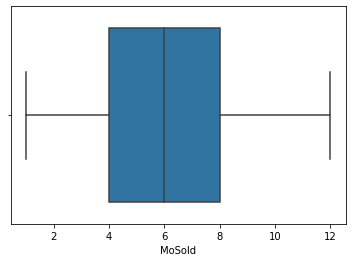

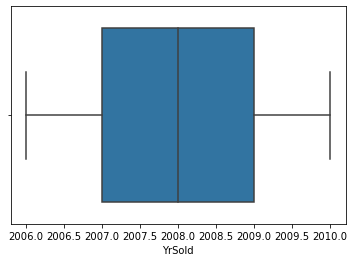

In [43]:
for i in df._get_numeric_data():
    sns.boxplot(df[i])
    plt.show()

In [44]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

In [45]:
ob_cols = [col for col in df.columns if df[col].dtypes == "O"]

In [46]:
for col in num_cols:
    df=thresholds(df, col)

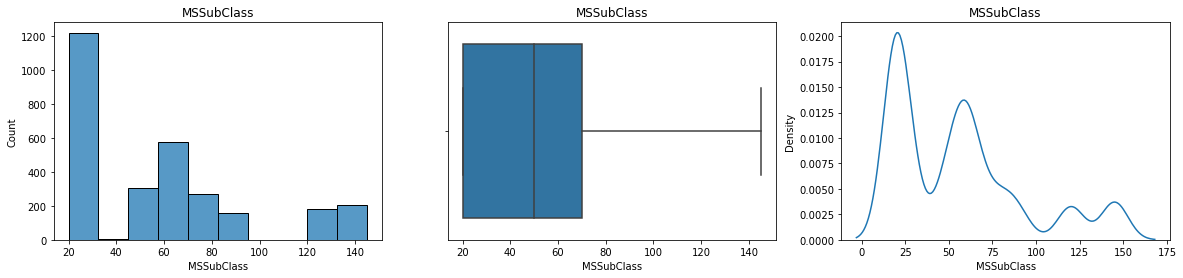

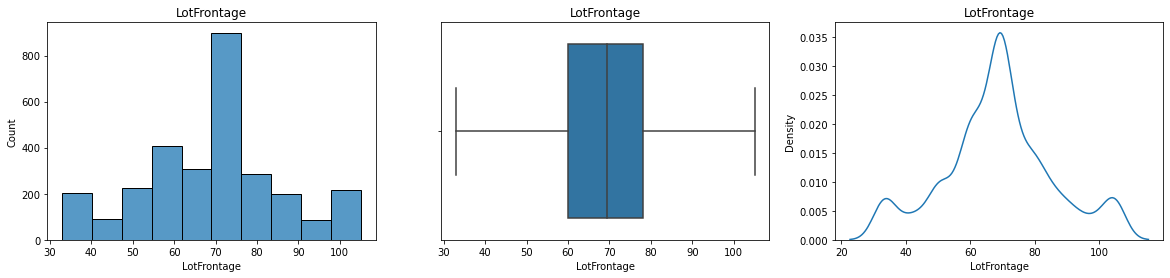

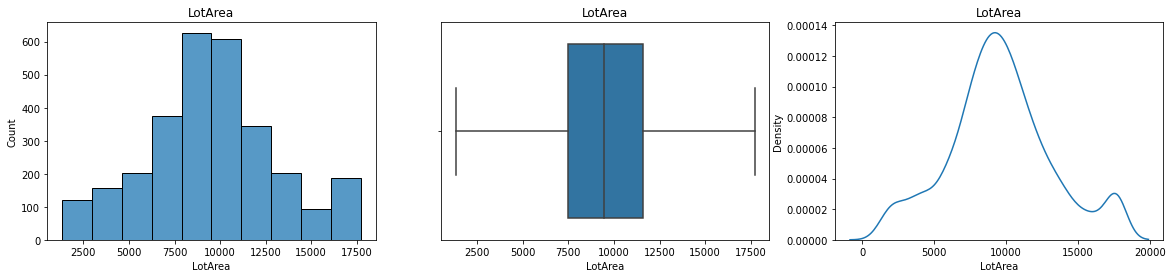

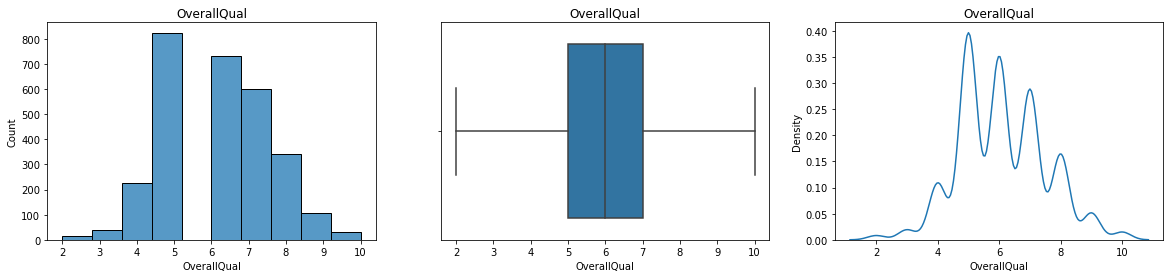

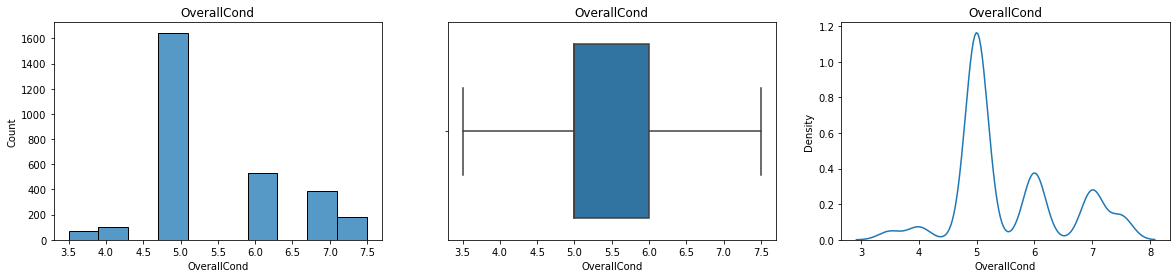

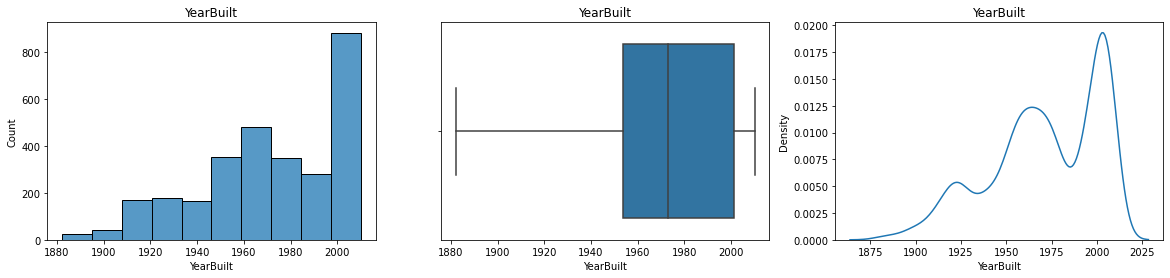

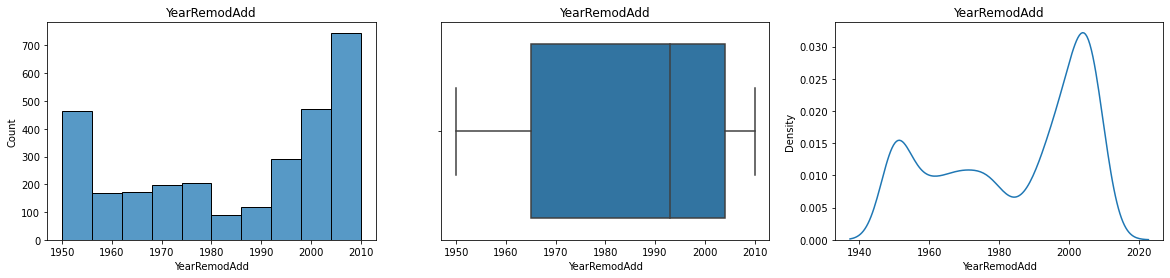

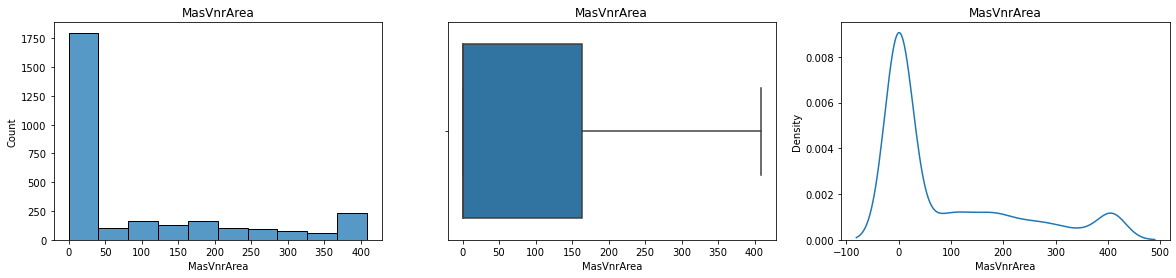

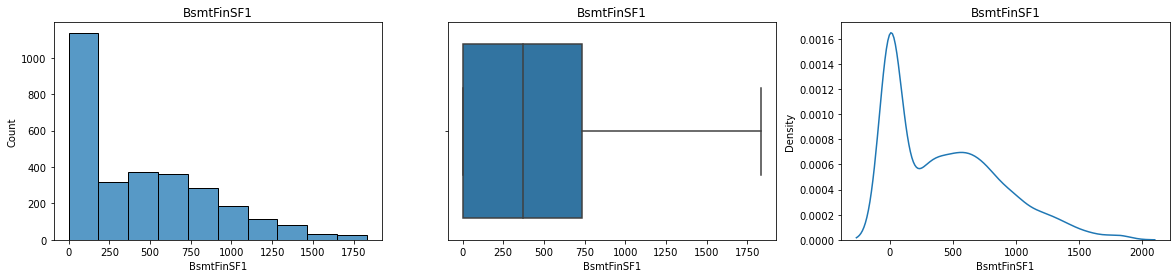

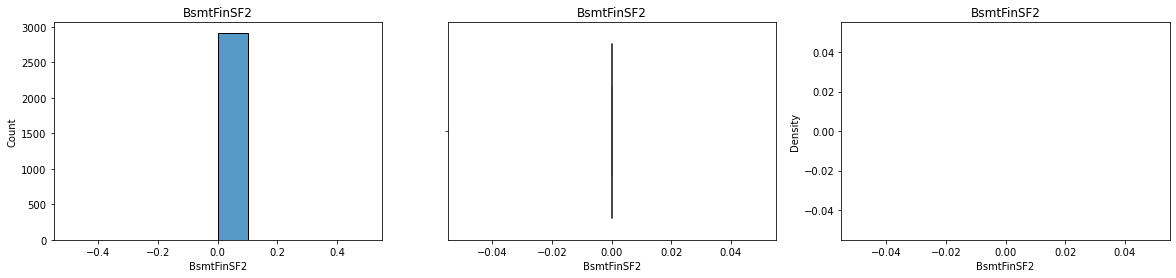

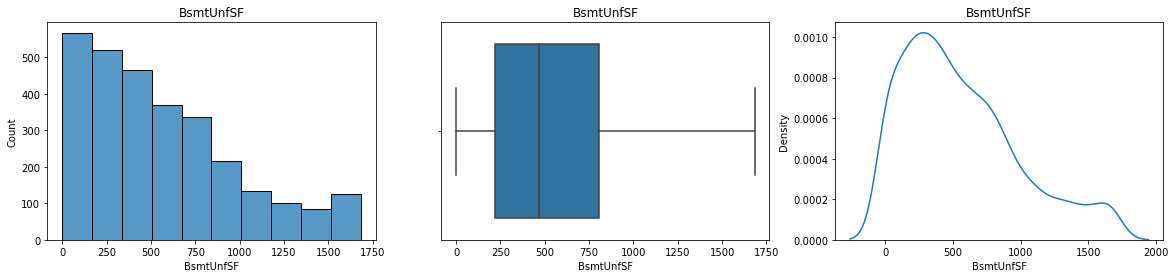

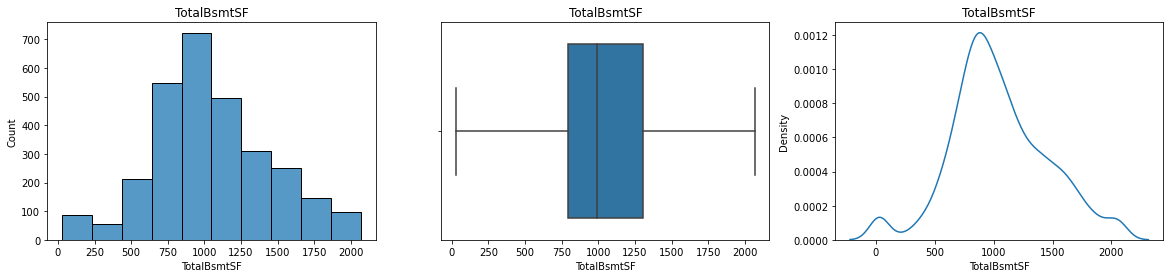

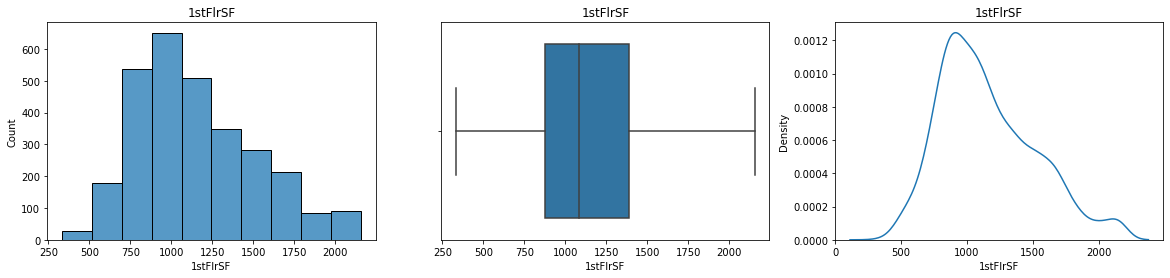

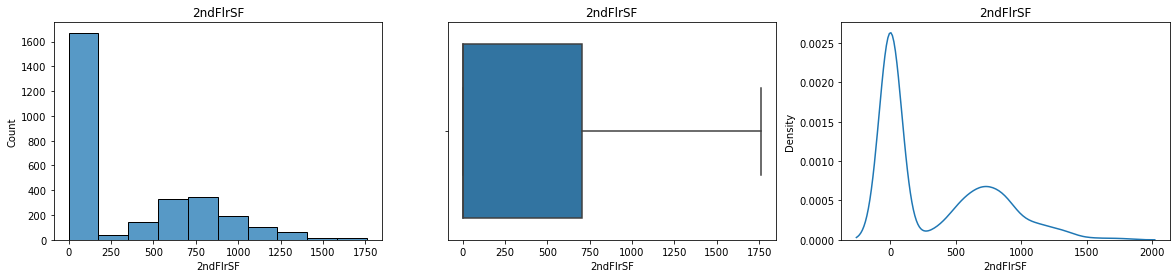

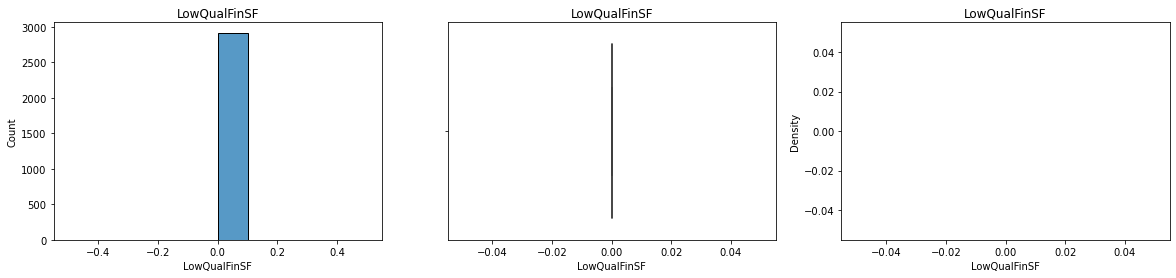

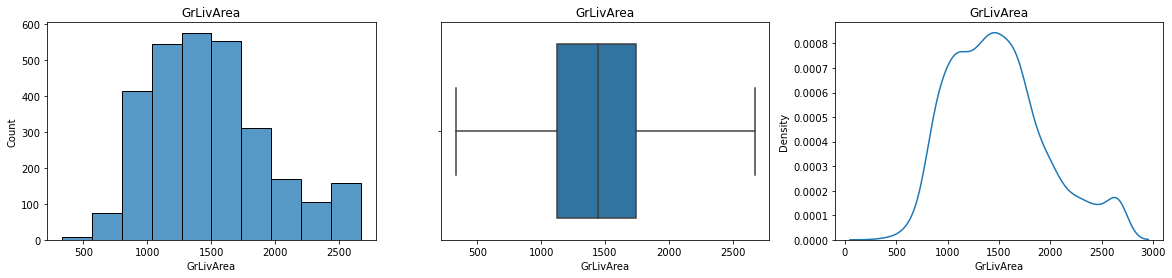

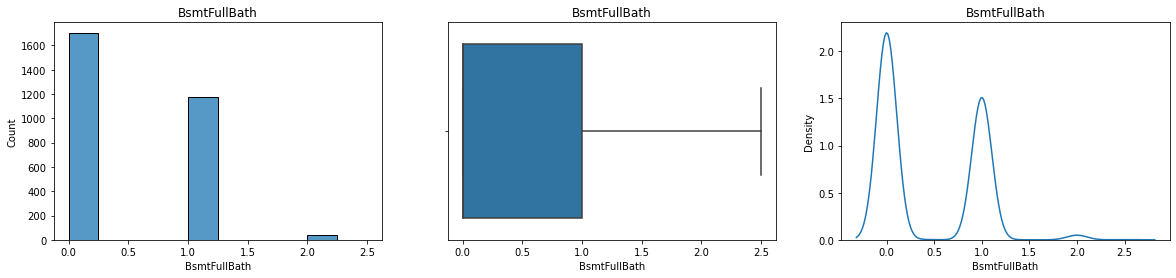

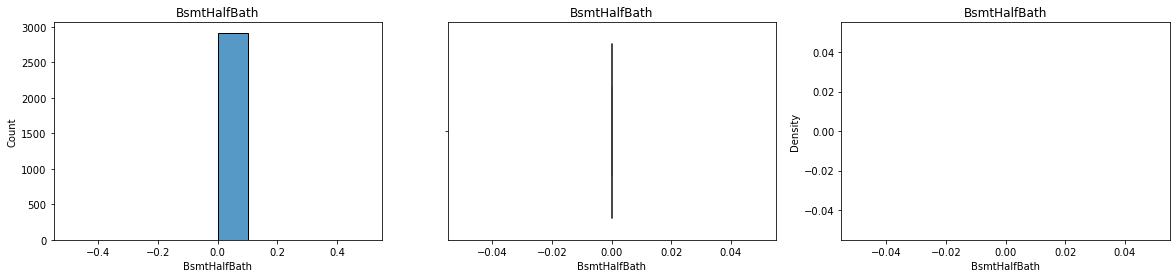

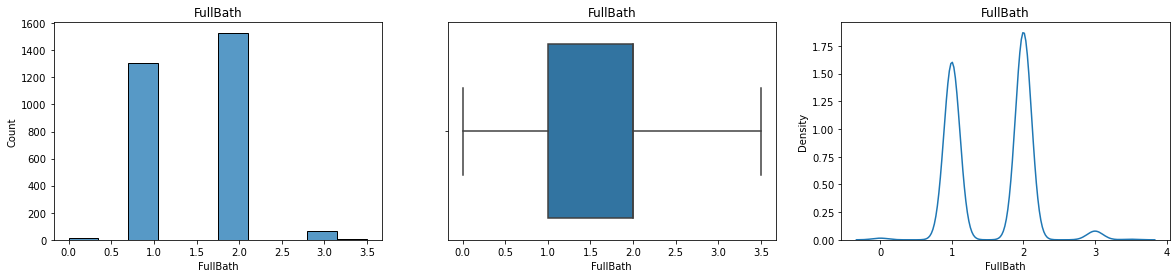

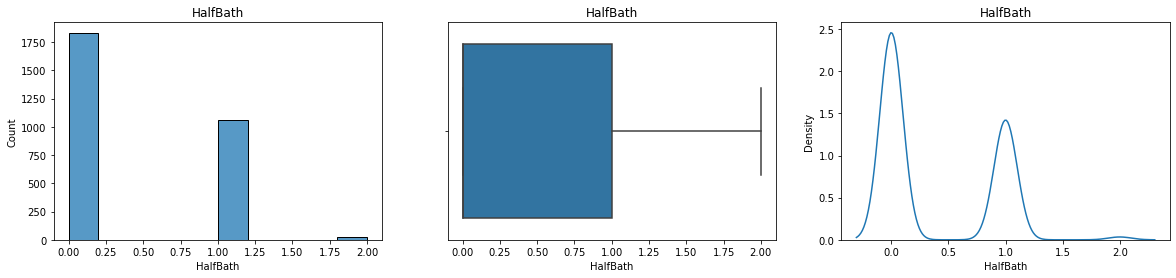

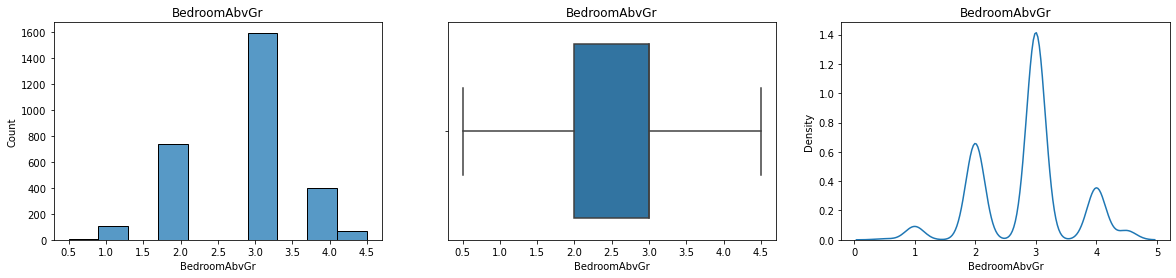

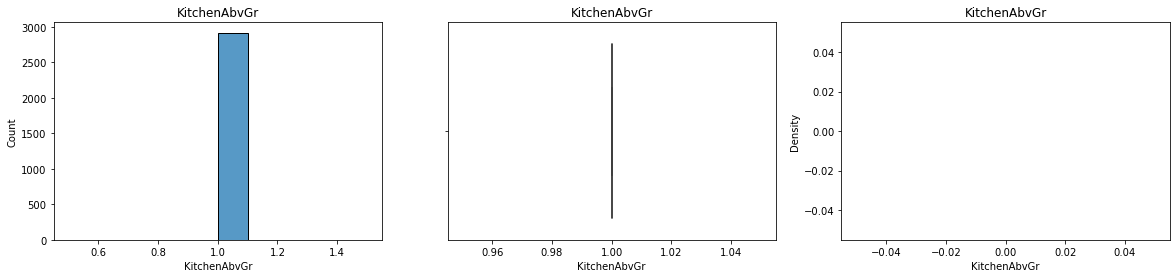

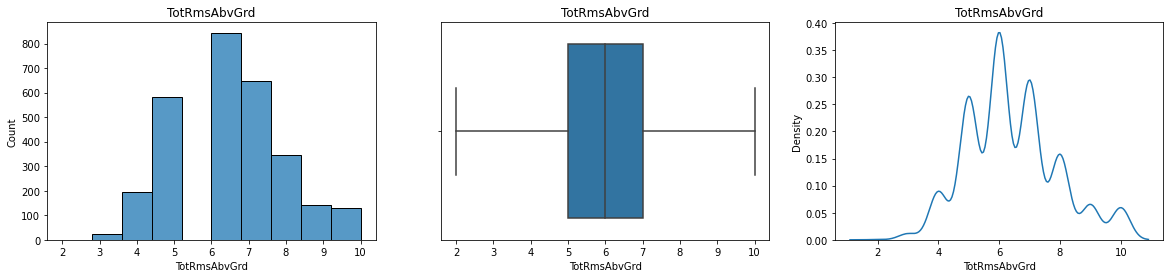

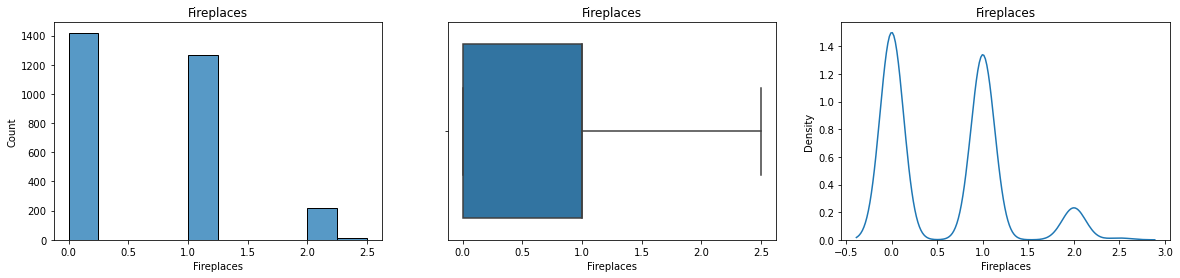

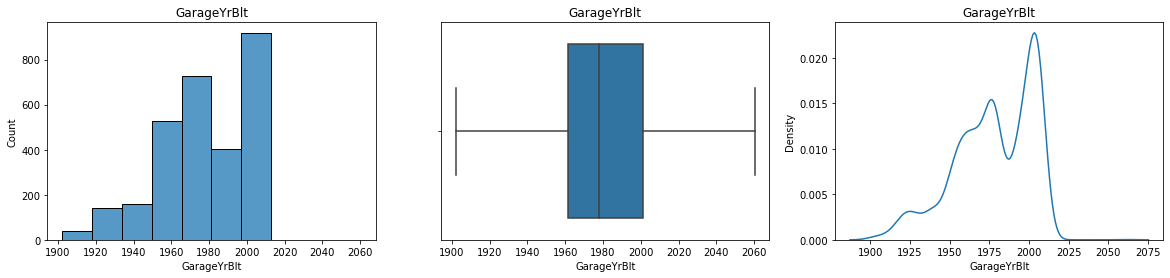

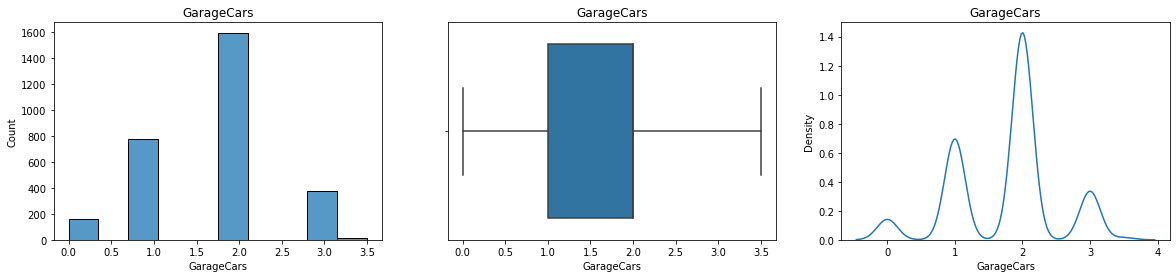

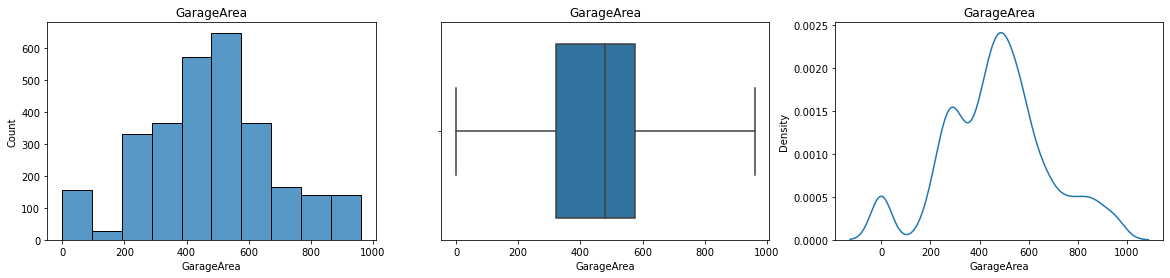

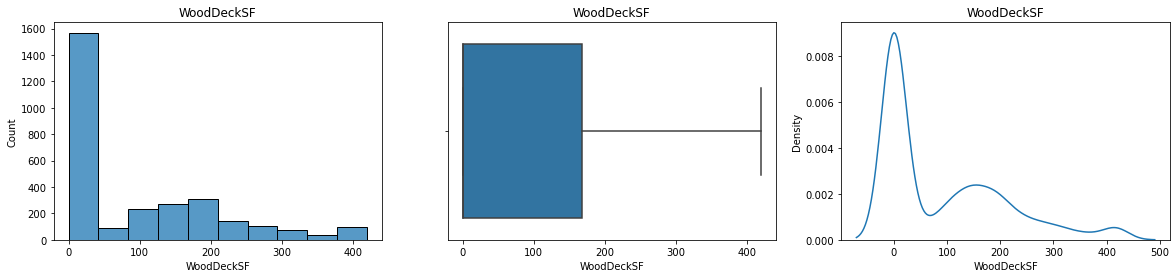

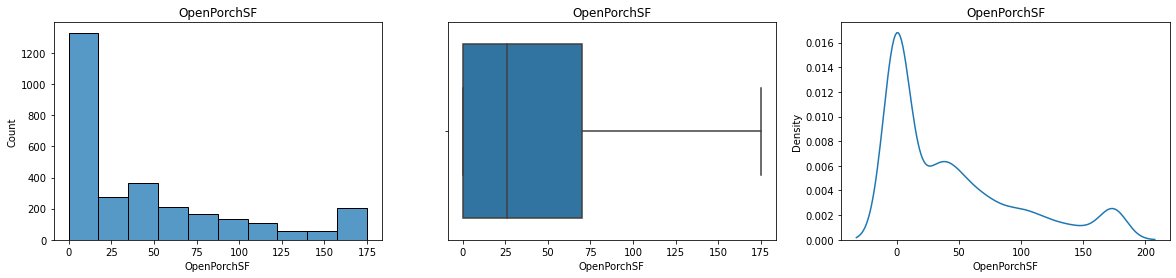

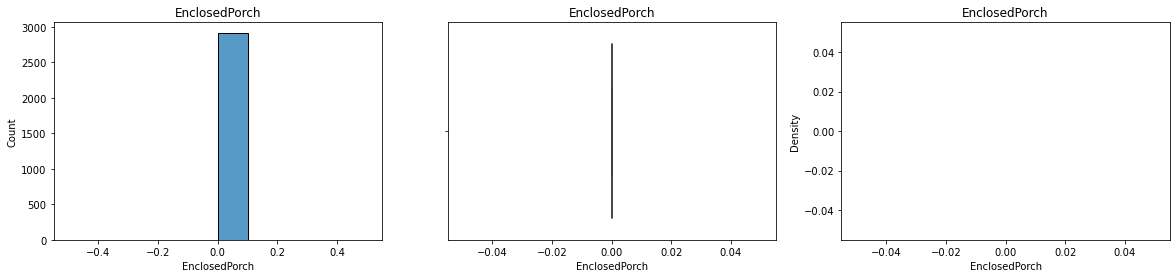

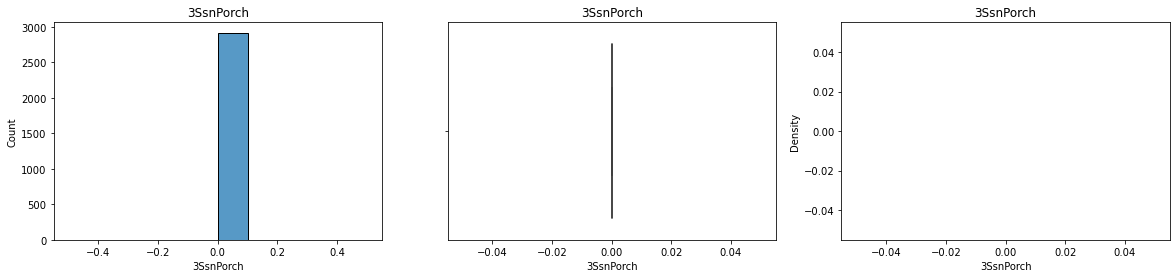

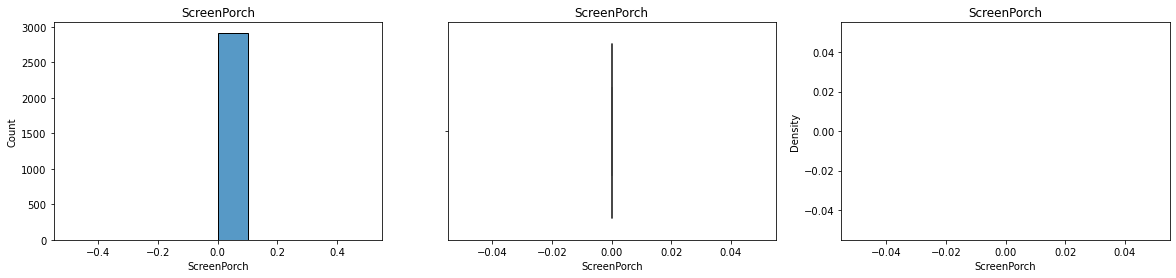

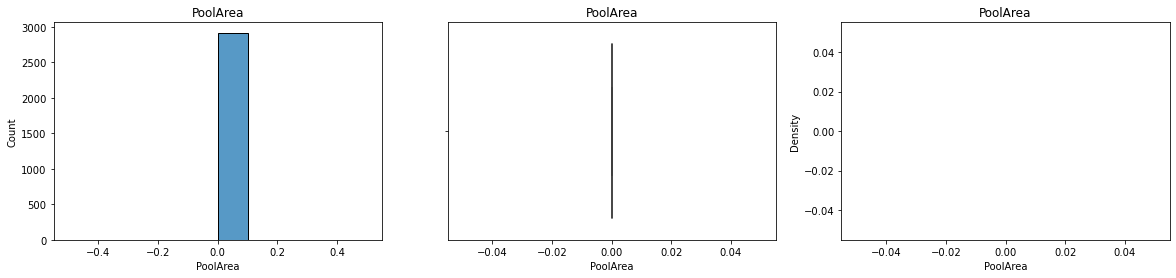

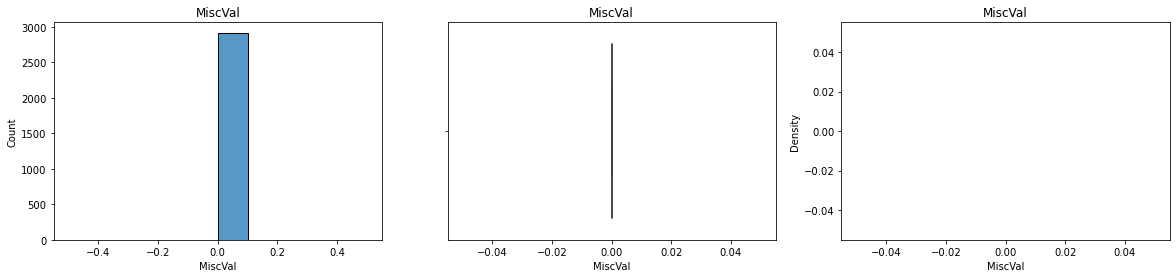

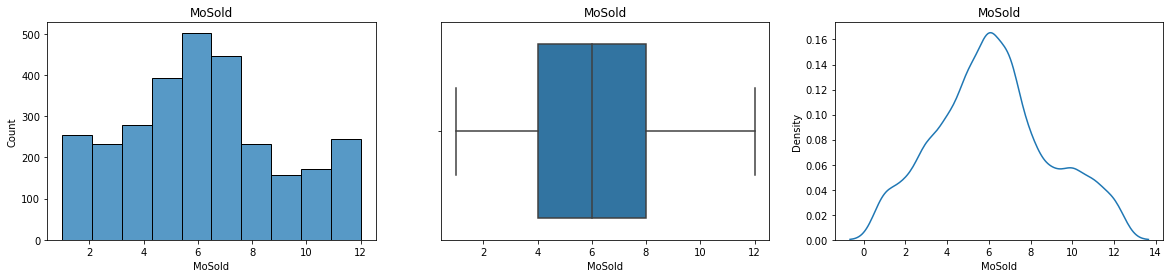

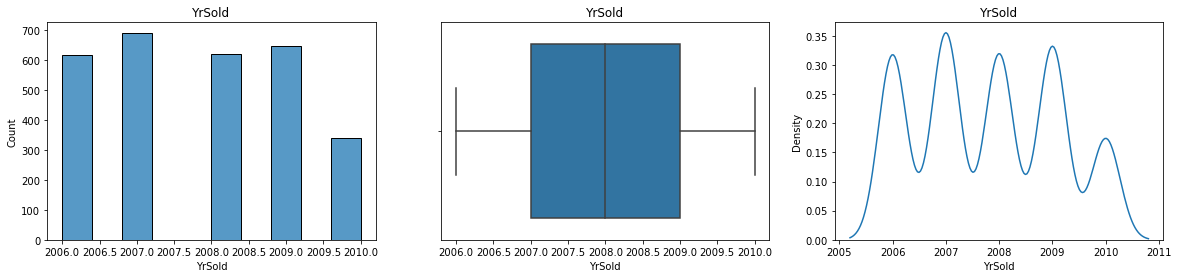

In [47]:
for i in num_cols:

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
    sns.histplot(df[i], bins=10, ax=axes[0])
    axes[0].set_title(i)
    
    sns.boxplot(df[i], ax=axes[1])
    axes[1].set_title(i)
   
    sns.kdeplot(df[i], ax=axes[2])
    axes[2].set_title(i)
    plt.show()

# Building Model

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler

In [49]:
df=pd.get_dummies(df, drop_first=True)

In [50]:
df.head(3)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
  Id                                                                          
x 1         60.0         65.0   8450.0          7.0          5.0     2003.0   
  2         20.0         80.0   9600.0          6.0          7.5     1976.0   
  3         60.0         68.0  11250.0          7.0          5.0     2001.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
  Id                                                    ...                   
x 1         2003.0       196.0       706.0         0.0  ...               0   
  2         1976.0         0.0       978.0         0.0  ...               0   
  3         2002.0       162.0       486.0         0.0  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
  Id                                                            
x 1                0             0             0            1   
  2                0             0             0            1   
  3                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
  Id                                                                      
x 1                       0                     0                     0   
  2                       0                     0                     0   
  3                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
  Id                                               
x 1                      1                      0  
  2                      1                      0  
  3                      1                      0  

[3 rows x 232 columns]

In [51]:
Train=df.loc['x']
Test=df.loc['y']

In [52]:
print(Train.shape, Test.shape)

(1460, 232) (1459, 232)


In [53]:
Train['SalePrice']=SalePrice

In [54]:
Train1=Train.copy()

In [55]:
#Min-Max Scaler
def minmax_scaler(dataframe, col_names, feature_range=(0,1)):
    minmax_scaler = MinMaxScaler(feature_range=feature_range)
    col_names=[col for col in col_names]
    dataframe[col_names] = minmax_scaler.fit_transform(dataframe[col_names])
    return dataframe

In [56]:
Train=minmax_scaler(Train, Train._get_numeric_data())

In [57]:
X=Train.drop('SalePrice', axis=1)
Y=Train[['SalePrice']]
print(Y.shape, X.shape)

(1460, 1) (1460, 232)


In [58]:
def best_randomstate(x,y):
    min_error=100
    model=Lasso()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(ytest, p)
        if mse<min_error:
            min_error=mse
            j=i
    return j

In [59]:
randomstate=best_randomstate(X,Y)
randomstate

19

In [60]:
def results(Y_train, Y_train_pred, Y_test, Y_test_pred, model, score, X_train, X_test):
    print(type(model).__name__)
    print('Train Mse: {}'.format(mean_squared_error(Y_train, Y_train_pred)))
    print('Train Score: {}'.format(model.score(X_train, Y_train)))
    print('Test Mse: {}'.format(mean_squared_error(Y_test, Y_test_pred)))
    print('Test Score: {}'.format(model.score(X_test, Y_test)))
    print('Mean of Cross Validation Score: {}'.format(np.round(score.mean(),4)))
    print('------------------------------------------------------')

In [61]:
def models(df, reg_models):
    for model in reg_models:
        x=df.copy()
        x.drop('SalePrice',axis=1,inplace=True)
        y=df['SalePrice']
        X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=randomstate)
        model.fit(X_train,Y_train)
        Y_train_pred=model.predict(X_train)
        Y_test_pred=model.predict(X_test)
        score=cross_val_score(model,x,y,cv=10)
        results(Y_train, Y_train_pred, Y_test, Y_test_pred, model, score, X_train, X_test)

In [62]:
reg_models=[LinearRegression(), Ridge(), Lasso(), ElasticNet(), 
        KNeighborsRegressor(n_neighbors=3), DecisionTreeRegressor(max_depth=2)]

In [63]:
models(Train, reg_models)

LinearRegression
Train Mse: 0.0007815317647615603
Train Score: 0.9420230119807725
Test Mse: 86737821878548.75
Test Score: -1.06446806809165e+16
Mean of Cross Validation Score: -4.36961124448293e+18
------------------------------------------------------
Ridge
Train Mse: 0.0010022606046726128
Train Score: 0.925648510157516
Test Mse: 0.0016709386632144
Test Score: 0.7949382619704266
Mean of Cross Validation Score: 0.8668
------------------------------------------------------
Lasso
Train Mse: 0.013480033914531283
Train Score: 0.0
Test Mse: 0.008230345372625092
Test Score: -0.010048402044548821
Mean of Cross Validation Score: -0.0076
------------------------------------------------------
ElasticNet
Train Mse: 0.013480033914531283
Train Score: 0.0
Test Mse: 0.008230345372625092
Test Score: -0.010048402044548821
Mean of Cross Validation Score: -0.0076
------------------------------------------------------
KNeighborsRegressor
Train Mse: 0.0018158433022556915
Train Score: 0.8652938624806991
Tes

# Model Tuning

In [64]:
model_parameters={
    'Ridge' : {
        'model': Ridge(),
        'params': {'alpha': [0.1, 0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1], 
                   'solver': ['auto', 'svd', 'cholesky']}},
    'Lasso': {
        'model': Lasso(),
        'params': {'selection': ['cyclic', 'random'], 
                  'alpha': [0.1,0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1]}},
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                   'splitter': ['best', 'random']}}, 
    'KNeighbors': {
        'model': KNeighborsRegressor(), 
        'params': {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                  'weights': ['uniform', 'distance'],
                  'n_neighbors': [3, 4, 5]}},
    'ElasticNet': {
        'model': ElasticNet(), 
        'params': {'alpha': [0.1,0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1],
                  'selection': ['cyclic', 'random']}},
    'LGBMRegressor': {
        'model': LGBMRegressor(),
        'params': {'learning_rate ': [0.1, 0.2], 'max_depth': list(range(-1, 2, 1)), 
                   'n_estimators': list(range(97, 103))}},
    'CatBoostRegressor': {
        'model': CatBoostRegressor(),
        'params': {}}
}

In [65]:
def model_tunings(x,y, model_params):
    results=[]
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=randomstate)  
    for model_name, mp in model_params.items():
        clf=GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
        clf.fit(X_train, Y_train)
        Y_train_pred=clf.predict(X_train)
        Y_test_pred=clf.predict(X_test)
        train_error=mean_squared_error(Y_train, Y_train_pred)
        train_score=clf.score(X_train, Y_train)
        test_error=mean_squared_error(Y_test, Y_test_pred)
        test_score=clf.score(X_test, Y_test)
        print(model_name)
        print('Train Mse: {}'.format(train_error))
        print('Train Score: {}'.format(train_score))
        print('Test Mse: {}'.format(test_error))
        print('Test Score: {}'.format(test_score))
        print('------------------------------------------------------')
        results.append({'model': model_name, 
                        'Train Error': train_error,
                        'Train Score': train_score,
                        'Test Error': test_error,
                        'Test Score': test_score,
                        'best_score': clf.best_score_,
                        'best_params': clf.best_params_})
    return results

In [66]:
scores = model_tunings(X, Y, model_parameters)

Ridge
Train Mse: 0.0010022606046726126
Train Score: 0.925648510157516
Test Mse: 0.001670938663214401
Test Score: 0.7949382619704264
------------------------------------------------------
Lasso
Train Mse: 0.0018020972671870103
Train Score: 0.8663135954543575
Test Mse: 0.0015113711519999825
Test Score: 0.8145207828031995
------------------------------------------------------
Decision Tree
Train Mse: 0.0
Train Score: 1.0
Test Mse: 0.0027124704980451206
Test Score: 0.6671188913583086
------------------------------------------------------
KNeighbors
Train Mse: 2.6225696648037918e-18
Train Score: 0.9999999999999998
Test Mse: 0.002807564817922991
Test Score: 0.6554486805120388
------------------------------------------------------
ElasticNet
Train Mse: 0.001448659242466466
Train Score: 0.8925329675243003
Test Mse: 0.001479796307661698
Test Score: 0.8183957260315562
------------------------------------------------------
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be igno

[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.1
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.1
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.1
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.1
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.1
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.1
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= wi

[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.2
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.2
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.2
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.2
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.2
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.2
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= wi

[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.2
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.2
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.2
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.2
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.2
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.2
[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= wi

81:	learn: 0.0358216	total: 1.49s	remaining: 16.6s
82:	learn: 0.0355820	total: 1.5s	remaining: 16.5s
83:	learn: 0.0353790	total: 1.51s	remaining: 16.5s
84:	learn: 0.0352149	total: 1.52s	remaining: 16.4s
85:	learn: 0.0349809	total: 1.53s	remaining: 16.3s
86:	learn: 0.0347597	total: 1.54s	remaining: 16.2s
87:	learn: 0.0345813	total: 1.55s	remaining: 16.1s
88:	learn: 0.0344054	total: 1.56s	remaining: 16s
89:	learn: 0.0341762	total: 1.58s	remaining: 16s
90:	learn: 0.0339954	total: 1.59s	remaining: 15.9s
91:	learn: 0.0338293	total: 1.6s	remaining: 15.8s
92:	learn: 0.0336591	total: 1.63s	remaining: 15.9s
93:	learn: 0.0334675	total: 1.64s	remaining: 15.8s
94:	learn: 0.0332485	total: 1.65s	remaining: 15.8s
95:	learn: 0.0330710	total: 1.67s	remaining: 15.7s
96:	learn: 0.0329244	total: 1.68s	remaining: 15.7s
97:	learn: 0.0327194	total: 1.69s	remaining: 15.6s
98:	learn: 0.0325999	total: 1.71s	remaining: 15.5s
99:	learn: 0.0324461	total: 1.72s	remaining: 15.5s
100:	learn: 0.0323013	total: 1.73s	re

241:	learn: 0.0214025	total: 3.5s	remaining: 11s
242:	learn: 0.0213302	total: 3.51s	remaining: 10.9s
243:	learn: 0.0213206	total: 3.53s	remaining: 10.9s
244:	learn: 0.0212658	total: 3.54s	remaining: 10.9s
245:	learn: 0.0212351	total: 3.55s	remaining: 10.9s
246:	learn: 0.0212255	total: 3.57s	remaining: 10.9s
247:	learn: 0.0212163	total: 3.59s	remaining: 10.9s
248:	learn: 0.0211767	total: 3.6s	remaining: 10.9s
249:	learn: 0.0211443	total: 3.61s	remaining: 10.8s
250:	learn: 0.0210900	total: 3.63s	remaining: 10.8s
251:	learn: 0.0210762	total: 3.64s	remaining: 10.8s
252:	learn: 0.0210212	total: 3.65s	remaining: 10.8s
253:	learn: 0.0210108	total: 3.66s	remaining: 10.8s
254:	learn: 0.0209331	total: 3.67s	remaining: 10.7s
255:	learn: 0.0209203	total: 3.68s	remaining: 10.7s
256:	learn: 0.0208504	total: 3.71s	remaining: 10.7s
257:	learn: 0.0207918	total: 3.72s	remaining: 10.7s
258:	learn: 0.0207822	total: 3.73s	remaining: 10.7s
259:	learn: 0.0207695	total: 3.75s	remaining: 10.7s
260:	learn: 0.02

409:	learn: 0.0163459	total: 6.02s	remaining: 8.66s
410:	learn: 0.0163181	total: 6.03s	remaining: 8.64s
411:	learn: 0.0163151	total: 6.04s	remaining: 8.63s
412:	learn: 0.0163127	total: 6.05s	remaining: 8.6s
413:	learn: 0.0162708	total: 6.06s	remaining: 8.58s
414:	learn: 0.0162488	total: 6.08s	remaining: 8.57s
415:	learn: 0.0162364	total: 6.09s	remaining: 8.55s
416:	learn: 0.0161871	total: 6.1s	remaining: 8.53s
417:	learn: 0.0161632	total: 6.12s	remaining: 8.52s
418:	learn: 0.0161367	total: 6.13s	remaining: 8.49s
419:	learn: 0.0160845	total: 6.14s	remaining: 8.47s
420:	learn: 0.0160450	total: 6.15s	remaining: 8.46s
421:	learn: 0.0160139	total: 6.16s	remaining: 8.44s
422:	learn: 0.0159823	total: 6.17s	remaining: 8.42s
423:	learn: 0.0159606	total: 6.18s	remaining: 8.4s
424:	learn: 0.0159583	total: 6.19s	remaining: 8.37s
425:	learn: 0.0159295	total: 6.2s	remaining: 8.35s
426:	learn: 0.0159003	total: 6.21s	remaining: 8.33s
427:	learn: 0.0158661	total: 6.22s	remaining: 8.31s
428:	learn: 0.01

569:	learn: 0.0126516	total: 7.96s	remaining: 6.01s
570:	learn: 0.0126245	total: 7.98s	remaining: 5.99s
571:	learn: 0.0126008	total: 7.99s	remaining: 5.98s
572:	learn: 0.0125814	total: 8s	remaining: 5.96s
573:	learn: 0.0125514	total: 8.02s	remaining: 5.95s
574:	learn: 0.0125224	total: 8.03s	remaining: 5.94s
575:	learn: 0.0125124	total: 8.04s	remaining: 5.92s
576:	learn: 0.0124901	total: 8.06s	remaining: 5.91s
577:	learn: 0.0124884	total: 8.07s	remaining: 5.89s
578:	learn: 0.0124624	total: 8.08s	remaining: 5.88s
579:	learn: 0.0124279	total: 8.11s	remaining: 5.87s
580:	learn: 0.0124265	total: 8.12s	remaining: 5.86s
581:	learn: 0.0124141	total: 8.14s	remaining: 5.85s
582:	learn: 0.0123993	total: 8.16s	remaining: 5.83s
583:	learn: 0.0123977	total: 8.17s	remaining: 5.82s
584:	learn: 0.0123744	total: 8.19s	remaining: 5.81s
585:	learn: 0.0123544	total: 8.2s	remaining: 5.79s
586:	learn: 0.0123530	total: 8.21s	remaining: 5.78s
587:	learn: 0.0123418	total: 8.23s	remaining: 5.76s
588:	learn: 0.01

735:	learn: 0.0101704	total: 10.4s	remaining: 3.75s
736:	learn: 0.0101624	total: 10.5s	remaining: 3.73s
737:	learn: 0.0101534	total: 10.5s	remaining: 3.72s
738:	learn: 0.0101324	total: 10.5s	remaining: 3.7s
739:	learn: 0.0101090	total: 10.5s	remaining: 3.69s
740:	learn: 0.0100833	total: 10.5s	remaining: 3.67s
741:	learn: 0.0100702	total: 10.5s	remaining: 3.65s
742:	learn: 0.0100519	total: 10.5s	remaining: 3.64s
743:	learn: 0.0100365	total: 10.5s	remaining: 3.62s
744:	learn: 0.0100356	total: 10.5s	remaining: 3.61s
745:	learn: 0.0100153	total: 10.5s	remaining: 3.59s
746:	learn: 0.0100145	total: 10.6s	remaining: 3.58s
747:	learn: 0.0100023	total: 10.6s	remaining: 3.56s
748:	learn: 0.0099890	total: 10.6s	remaining: 3.55s
749:	learn: 0.0099882	total: 10.6s	remaining: 3.53s
750:	learn: 0.0099757	total: 10.6s	remaining: 3.52s
751:	learn: 0.0099613	total: 10.6s	remaining: 3.5s
752:	learn: 0.0099466	total: 10.6s	remaining: 3.49s
753:	learn: 0.0099456	total: 10.6s	remaining: 3.47s
754:	learn: 0.

895:	learn: 0.0083370	total: 12.4s	remaining: 1.44s
896:	learn: 0.0083240	total: 12.5s	remaining: 1.43s
897:	learn: 0.0083158	total: 12.5s	remaining: 1.42s
898:	learn: 0.0083077	total: 12.5s	remaining: 1.4s
899:	learn: 0.0083072	total: 12.5s	remaining: 1.39s
900:	learn: 0.0082934	total: 12.5s	remaining: 1.38s
901:	learn: 0.0082828	total: 12.5s	remaining: 1.36s
902:	learn: 0.0082763	total: 12.6s	remaining: 1.35s
903:	learn: 0.0082758	total: 12.6s	remaining: 1.33s
904:	learn: 0.0082677	total: 12.6s	remaining: 1.32s
905:	learn: 0.0082571	total: 12.6s	remaining: 1.31s
906:	learn: 0.0082535	total: 12.6s	remaining: 1.29s
907:	learn: 0.0082508	total: 12.6s	remaining: 1.28s
908:	learn: 0.0082403	total: 12.6s	remaining: 1.27s
909:	learn: 0.0082393	total: 12.7s	remaining: 1.25s
910:	learn: 0.0082201	total: 12.7s	remaining: 1.24s
911:	learn: 0.0082058	total: 12.7s	remaining: 1.22s
912:	learn: 0.0081889	total: 12.7s	remaining: 1.21s
913:	learn: 0.0081885	total: 12.7s	remaining: 1.2s
914:	learn: 0.

67:	learn: 0.0401166	total: 979ms	remaining: 13.4s
68:	learn: 0.0398567	total: 990ms	remaining: 13.4s
69:	learn: 0.0395438	total: 999ms	remaining: 13.3s
70:	learn: 0.0392196	total: 1.01s	remaining: 13.2s
71:	learn: 0.0389324	total: 1.02s	remaining: 13.1s
72:	learn: 0.0387012	total: 1.03s	remaining: 13.1s
73:	learn: 0.0384093	total: 1.04s	remaining: 13s
74:	learn: 0.0381630	total: 1.05s	remaining: 12.9s
75:	learn: 0.0378670	total: 1.06s	remaining: 12.8s
76:	learn: 0.0375681	total: 1.07s	remaining: 12.8s
77:	learn: 0.0373080	total: 1.08s	remaining: 12.7s
78:	learn: 0.0369999	total: 1.08s	remaining: 12.7s
79:	learn: 0.0367222	total: 1.09s	remaining: 12.6s
80:	learn: 0.0364283	total: 1.1s	remaining: 12.5s
81:	learn: 0.0361283	total: 1.11s	remaining: 12.5s
82:	learn: 0.0358990	total: 1.12s	remaining: 12.4s
83:	learn: 0.0356445	total: 1.13s	remaining: 12.3s
84:	learn: 0.0354236	total: 1.14s	remaining: 12.3s
85:	learn: 0.0352100	total: 1.15s	remaining: 12.2s
86:	learn: 0.0349575	total: 1.16s	

229:	learn: 0.0216889	total: 3.41s	remaining: 11.4s
230:	learn: 0.0216390	total: 3.44s	remaining: 11.4s
231:	learn: 0.0215618	total: 3.45s	remaining: 11.4s
232:	learn: 0.0215139	total: 3.46s	remaining: 11.4s
233:	learn: 0.0214493	total: 3.48s	remaining: 11.4s
234:	learn: 0.0214288	total: 3.49s	remaining: 11.4s
235:	learn: 0.0213976	total: 3.5s	remaining: 11.3s
236:	learn: 0.0213701	total: 3.51s	remaining: 11.3s
237:	learn: 0.0213473	total: 3.52s	remaining: 11.3s
238:	learn: 0.0212908	total: 3.54s	remaining: 11.3s
239:	learn: 0.0212548	total: 3.55s	remaining: 11.2s
240:	learn: 0.0212338	total: 3.57s	remaining: 11.3s
241:	learn: 0.0212231	total: 3.59s	remaining: 11.2s
242:	learn: 0.0212007	total: 3.6s	remaining: 11.2s
243:	learn: 0.0211729	total: 3.61s	remaining: 11.2s
244:	learn: 0.0211546	total: 3.63s	remaining: 11.2s
245:	learn: 0.0211078	total: 3.64s	remaining: 11.2s
246:	learn: 0.0210702	total: 3.65s	remaining: 11.1s
247:	learn: 0.0210507	total: 3.66s	remaining: 11.1s
248:	learn: 0.

390:	learn: 0.0163669	total: 5.38s	remaining: 8.37s
391:	learn: 0.0163398	total: 5.38s	remaining: 8.35s
392:	learn: 0.0163354	total: 5.39s	remaining: 8.33s
393:	learn: 0.0163020	total: 5.41s	remaining: 8.31s
394:	learn: 0.0162575	total: 5.42s	remaining: 8.29s
395:	learn: 0.0162374	total: 5.43s	remaining: 8.28s
396:	learn: 0.0162075	total: 5.45s	remaining: 8.28s
397:	learn: 0.0161716	total: 5.47s	remaining: 8.27s
398:	learn: 0.0161636	total: 5.48s	remaining: 8.25s
399:	learn: 0.0161419	total: 5.49s	remaining: 8.23s
400:	learn: 0.0161168	total: 5.5s	remaining: 8.21s
401:	learn: 0.0160784	total: 5.51s	remaining: 8.2s
402:	learn: 0.0160520	total: 5.52s	remaining: 8.18s
403:	learn: 0.0160183	total: 5.53s	remaining: 8.16s
404:	learn: 0.0160057	total: 5.54s	remaining: 8.14s
405:	learn: 0.0159712	total: 5.55s	remaining: 8.12s
406:	learn: 0.0159324	total: 5.56s	remaining: 8.1s
407:	learn: 0.0158799	total: 5.57s	remaining: 8.09s
408:	learn: 0.0158607	total: 5.58s	remaining: 8.07s
409:	learn: 0.0

549:	learn: 0.0127962	total: 7.34s	remaining: 6s
550:	learn: 0.0127595	total: 7.35s	remaining: 5.99s
551:	learn: 0.0127377	total: 7.37s	remaining: 5.98s
552:	learn: 0.0127193	total: 7.38s	remaining: 5.97s
553:	learn: 0.0127173	total: 7.4s	remaining: 5.96s
554:	learn: 0.0127088	total: 7.41s	remaining: 5.95s
555:	learn: 0.0126752	total: 7.43s	remaining: 5.93s
556:	learn: 0.0126583	total: 7.44s	remaining: 5.92s
557:	learn: 0.0126303	total: 7.46s	remaining: 5.91s
558:	learn: 0.0126023	total: 7.47s	remaining: 5.9s
559:	learn: 0.0125864	total: 7.49s	remaining: 5.88s
560:	learn: 0.0125649	total: 7.5s	remaining: 5.87s
561:	learn: 0.0125439	total: 7.52s	remaining: 5.86s
562:	learn: 0.0125050	total: 7.53s	remaining: 5.85s
563:	learn: 0.0124882	total: 7.55s	remaining: 5.84s
564:	learn: 0.0124643	total: 7.57s	remaining: 5.83s
565:	learn: 0.0124487	total: 7.58s	remaining: 5.82s
566:	learn: 0.0124213	total: 7.6s	remaining: 5.8s
567:	learn: 0.0123992	total: 7.62s	remaining: 5.79s
568:	learn: 0.012364

712:	learn: 0.0099944	total: 9.72s	remaining: 3.91s
713:	learn: 0.0099821	total: 9.74s	remaining: 3.9s
714:	learn: 0.0099674	total: 9.75s	remaining: 3.89s
715:	learn: 0.0099388	total: 9.77s	remaining: 3.88s
716:	learn: 0.0099145	total: 9.79s	remaining: 3.86s
717:	learn: 0.0099077	total: 9.8s	remaining: 3.85s
718:	learn: 0.0098844	total: 9.82s	remaining: 3.84s
719:	learn: 0.0098585	total: 9.84s	remaining: 3.83s
720:	learn: 0.0098451	total: 9.86s	remaining: 3.81s
721:	learn: 0.0098415	total: 9.87s	remaining: 3.8s
722:	learn: 0.0098289	total: 9.89s	remaining: 3.79s
723:	learn: 0.0098036	total: 9.92s	remaining: 3.78s
724:	learn: 0.0097839	total: 9.93s	remaining: 3.77s
725:	learn: 0.0097675	total: 9.94s	remaining: 3.75s
726:	learn: 0.0097662	total: 9.95s	remaining: 3.74s
727:	learn: 0.0097652	total: 9.96s	remaining: 3.72s
728:	learn: 0.0097518	total: 9.97s	remaining: 3.71s
729:	learn: 0.0097246	total: 9.98s	remaining: 3.69s
730:	learn: 0.0097078	total: 9.99s	remaining: 3.68s
731:	learn: 0.0

881:	learn: 0.0078505	total: 12.1s	remaining: 1.62s
882:	learn: 0.0078392	total: 12.1s	remaining: 1.61s
883:	learn: 0.0078322	total: 12.2s	remaining: 1.59s
884:	learn: 0.0078252	total: 12.2s	remaining: 1.58s
885:	learn: 0.0078156	total: 12.2s	remaining: 1.57s
886:	learn: 0.0078035	total: 12.2s	remaining: 1.55s
887:	learn: 0.0077927	total: 12.2s	remaining: 1.54s
888:	learn: 0.0077858	total: 12.2s	remaining: 1.53s
889:	learn: 0.0077795	total: 12.2s	remaining: 1.51s
890:	learn: 0.0077685	total: 12.3s	remaining: 1.5s
891:	learn: 0.0077680	total: 12.3s	remaining: 1.49s
892:	learn: 0.0077611	total: 12.3s	remaining: 1.47s
893:	learn: 0.0077453	total: 12.3s	remaining: 1.46s
894:	learn: 0.0077379	total: 12.3s	remaining: 1.44s
895:	learn: 0.0077238	total: 12.3s	remaining: 1.43s
896:	learn: 0.0077153	total: 12.3s	remaining: 1.42s
897:	learn: 0.0077056	total: 12.4s	remaining: 1.4s
898:	learn: 0.0077007	total: 12.4s	remaining: 1.39s
899:	learn: 0.0076983	total: 12.4s	remaining: 1.38s
900:	learn: 0.

49:	learn: 0.0470406	total: 773ms	remaining: 14.7s
50:	learn: 0.0464735	total: 786ms	remaining: 14.6s
51:	learn: 0.0459141	total: 797ms	remaining: 14.5s
52:	learn: 0.0453673	total: 809ms	remaining: 14.5s
53:	learn: 0.0447771	total: 820ms	remaining: 14.4s
54:	learn: 0.0442591	total: 830ms	remaining: 14.3s
55:	learn: 0.0437345	total: 841ms	remaining: 14.2s
56:	learn: 0.0432944	total: 852ms	remaining: 14.1s
57:	learn: 0.0428042	total: 862ms	remaining: 14s
58:	learn: 0.0422533	total: 874ms	remaining: 13.9s
59:	learn: 0.0418211	total: 883ms	remaining: 13.8s
60:	learn: 0.0413476	total: 893ms	remaining: 13.7s
61:	learn: 0.0409502	total: 903ms	remaining: 13.7s
62:	learn: 0.0405476	total: 912ms	remaining: 13.6s
63:	learn: 0.0401377	total: 922ms	remaining: 13.5s
64:	learn: 0.0397992	total: 932ms	remaining: 13.4s
65:	learn: 0.0393995	total: 943ms	remaining: 13.3s
66:	learn: 0.0391211	total: 952ms	remaining: 13.3s
67:	learn: 0.0387711	total: 962ms	remaining: 13.2s
68:	learn: 0.0383879	total: 981ms

215:	learn: 0.0209712	total: 2.95s	remaining: 10.7s
216:	learn: 0.0209401	total: 2.96s	remaining: 10.7s
217:	learn: 0.0208898	total: 2.97s	remaining: 10.7s
218:	learn: 0.0208688	total: 2.99s	remaining: 10.7s
219:	learn: 0.0208449	total: 3s	remaining: 10.6s
220:	learn: 0.0207956	total: 3.01s	remaining: 10.6s
221:	learn: 0.0207304	total: 3.02s	remaining: 10.6s
222:	learn: 0.0207026	total: 3.03s	remaining: 10.6s
223:	learn: 0.0206397	total: 3.04s	remaining: 10.5s
224:	learn: 0.0205944	total: 3.05s	remaining: 10.5s
225:	learn: 0.0205609	total: 3.07s	remaining: 10.5s
226:	learn: 0.0204966	total: 3.08s	remaining: 10.5s
227:	learn: 0.0204737	total: 3.09s	remaining: 10.4s
228:	learn: 0.0204298	total: 3.1s	remaining: 10.4s
229:	learn: 0.0203685	total: 3.11s	remaining: 10.4s
230:	learn: 0.0203048	total: 3.12s	remaining: 10.4s
231:	learn: 0.0202695	total: 3.13s	remaining: 10.4s
232:	learn: 0.0202237	total: 3.14s	remaining: 10.3s
233:	learn: 0.0201868	total: 3.15s	remaining: 10.3s
234:	learn: 0.02

384:	learn: 0.0158371	total: 5.17s	remaining: 8.26s
385:	learn: 0.0158122	total: 5.18s	remaining: 8.25s
386:	learn: 0.0157805	total: 5.2s	remaining: 8.23s
387:	learn: 0.0157755	total: 5.21s	remaining: 8.22s
388:	learn: 0.0157567	total: 5.22s	remaining: 8.2s
389:	learn: 0.0157158	total: 5.24s	remaining: 8.19s
390:	learn: 0.0157035	total: 5.25s	remaining: 8.18s
391:	learn: 0.0156946	total: 5.26s	remaining: 8.16s
392:	learn: 0.0156739	total: 5.29s	remaining: 8.16s
393:	learn: 0.0156689	total: 5.3s	remaining: 8.15s
394:	learn: 0.0156491	total: 5.31s	remaining: 8.14s
395:	learn: 0.0156195	total: 5.33s	remaining: 8.13s
396:	learn: 0.0155919	total: 5.35s	remaining: 8.12s
397:	learn: 0.0155622	total: 5.37s	remaining: 8.12s
398:	learn: 0.0155265	total: 5.38s	remaining: 8.1s
399:	learn: 0.0155205	total: 5.4s	remaining: 8.09s
400:	learn: 0.0155159	total: 5.41s	remaining: 8.08s
401:	learn: 0.0154915	total: 5.43s	remaining: 8.08s
402:	learn: 0.0154512	total: 5.45s	remaining: 8.07s
403:	learn: 0.015

551:	learn: 0.0123020	total: 7.31s	remaining: 5.93s
552:	learn: 0.0122728	total: 7.32s	remaining: 5.92s
553:	learn: 0.0122590	total: 7.33s	remaining: 5.9s
554:	learn: 0.0122439	total: 7.34s	remaining: 5.89s
555:	learn: 0.0122308	total: 7.36s	remaining: 5.88s
556:	learn: 0.0122117	total: 7.37s	remaining: 5.86s
557:	learn: 0.0121855	total: 7.38s	remaining: 5.85s
558:	learn: 0.0121755	total: 7.39s	remaining: 5.83s
559:	learn: 0.0121468	total: 7.4s	remaining: 5.82s
560:	learn: 0.0121284	total: 7.41s	remaining: 5.8s
561:	learn: 0.0121067	total: 7.42s	remaining: 5.79s
562:	learn: 0.0120826	total: 7.43s	remaining: 5.77s
563:	learn: 0.0120533	total: 7.44s	remaining: 5.75s
564:	learn: 0.0120516	total: 7.45s	remaining: 5.74s
565:	learn: 0.0120269	total: 7.46s	remaining: 5.72s
566:	learn: 0.0120158	total: 7.47s	remaining: 5.71s
567:	learn: 0.0119891	total: 7.48s	remaining: 5.69s
568:	learn: 0.0119586	total: 7.49s	remaining: 5.67s
569:	learn: 0.0119417	total: 7.5s	remaining: 5.66s
570:	learn: 0.01

723:	learn: 0.0095835	total: 9.47s	remaining: 3.61s
724:	learn: 0.0095797	total: 9.49s	remaining: 3.6s
725:	learn: 0.0095665	total: 9.5s	remaining: 3.59s
726:	learn: 0.0095651	total: 9.52s	remaining: 3.57s
727:	learn: 0.0095624	total: 9.53s	remaining: 3.56s
728:	learn: 0.0095514	total: 9.54s	remaining: 3.55s
729:	learn: 0.0095363	total: 9.55s	remaining: 3.53s
730:	learn: 0.0095173	total: 9.57s	remaining: 3.52s
731:	learn: 0.0095079	total: 9.58s	remaining: 3.51s
732:	learn: 0.0094909	total: 9.6s	remaining: 3.5s
733:	learn: 0.0094790	total: 9.61s	remaining: 3.48s
734:	learn: 0.0094584	total: 9.62s	remaining: 3.47s
735:	learn: 0.0094526	total: 9.63s	remaining: 3.46s
736:	learn: 0.0094515	total: 9.65s	remaining: 3.44s
737:	learn: 0.0094317	total: 9.66s	remaining: 3.43s
738:	learn: 0.0094276	total: 9.68s	remaining: 3.42s
739:	learn: 0.0094151	total: 9.69s	remaining: 3.4s
740:	learn: 0.0094043	total: 9.71s	remaining: 3.39s
741:	learn: 0.0094024	total: 9.72s	remaining: 3.38s
742:	learn: 0.009

892:	learn: 0.0077306	total: 11.9s	remaining: 1.42s
893:	learn: 0.0077093	total: 11.9s	remaining: 1.41s
894:	learn: 0.0076961	total: 11.9s	remaining: 1.4s
895:	learn: 0.0076819	total: 12s	remaining: 1.39s
896:	learn: 0.0076704	total: 12s	remaining: 1.37s
897:	learn: 0.0076572	total: 12s	remaining: 1.36s
898:	learn: 0.0076453	total: 12s	remaining: 1.34s
899:	learn: 0.0076432	total: 12s	remaining: 1.33s
900:	learn: 0.0076232	total: 12s	remaining: 1.32s
901:	learn: 0.0076155	total: 12s	remaining: 1.3s
902:	learn: 0.0076064	total: 12s	remaining: 1.29s
903:	learn: 0.0075884	total: 12s	remaining: 1.28s
904:	learn: 0.0075743	total: 12s	remaining: 1.26s
905:	learn: 0.0075639	total: 12s	remaining: 1.25s
906:	learn: 0.0075487	total: 12.1s	remaining: 1.24s
907:	learn: 0.0075354	total: 12.1s	remaining: 1.22s
908:	learn: 0.0075280	total: 12.1s	remaining: 1.21s
909:	learn: 0.0075169	total: 12.1s	remaining: 1.19s
910:	learn: 0.0075125	total: 12.1s	remaining: 1.18s
911:	learn: 0.0075044	total: 12.1s	r

62:	learn: 0.0408156	total: 993ms	remaining: 14.8s
63:	learn: 0.0404198	total: 1s	remaining: 14.7s
64:	learn: 0.0400684	total: 1.01s	remaining: 14.6s
65:	learn: 0.0396885	total: 1.02s	remaining: 14.5s
66:	learn: 0.0393409	total: 1.03s	remaining: 14.4s
67:	learn: 0.0390226	total: 1.04s	remaining: 14.3s
68:	learn: 0.0386568	total: 1.05s	remaining: 14.2s
69:	learn: 0.0383784	total: 1.06s	remaining: 14.1s
70:	learn: 0.0380352	total: 1.07s	remaining: 14.1s
71:	learn: 0.0376611	total: 1.08s	remaining: 14s
72:	learn: 0.0373335	total: 1.1s	remaining: 13.9s
73:	learn: 0.0369589	total: 1.11s	remaining: 13.9s
74:	learn: 0.0366498	total: 1.12s	remaining: 13.8s
75:	learn: 0.0363881	total: 1.13s	remaining: 13.7s
76:	learn: 0.0361142	total: 1.14s	remaining: 13.6s
77:	learn: 0.0358474	total: 1.15s	remaining: 13.6s
78:	learn: 0.0355282	total: 1.16s	remaining: 13.5s
79:	learn: 0.0352951	total: 1.17s	remaining: 13.4s
80:	learn: 0.0350453	total: 1.18s	remaining: 13.3s
81:	learn: 0.0347756	total: 1.19s	rem

228:	learn: 0.0207836	total: 2.98s	remaining: 10s
229:	learn: 0.0207449	total: 2.99s	remaining: 10s
230:	learn: 0.0207108	total: 3s	remaining: 10s
231:	learn: 0.0206638	total: 3.02s	remaining: 9.99s
232:	learn: 0.0206424	total: 3.03s	remaining: 9.97s
233:	learn: 0.0205727	total: 3.04s	remaining: 9.95s
234:	learn: 0.0205359	total: 3.05s	remaining: 9.93s
235:	learn: 0.0204962	total: 3.06s	remaining: 9.92s
236:	learn: 0.0204718	total: 3.07s	remaining: 9.89s
237:	learn: 0.0204122	total: 3.08s	remaining: 9.88s
238:	learn: 0.0203599	total: 3.09s	remaining: 9.85s
239:	learn: 0.0203201	total: 3.1s	remaining: 9.83s
240:	learn: 0.0202954	total: 3.12s	remaining: 9.81s
241:	learn: 0.0202407	total: 3.13s	remaining: 9.79s
242:	learn: 0.0202136	total: 3.14s	remaining: 9.77s
243:	learn: 0.0201591	total: 3.15s	remaining: 9.75s
244:	learn: 0.0201221	total: 3.16s	remaining: 9.73s
245:	learn: 0.0200632	total: 3.17s	remaining: 9.71s
246:	learn: 0.0200395	total: 3.18s	remaining: 9.7s
247:	learn: 0.0199568	t

398:	learn: 0.0151447	total: 5.6s	remaining: 8.43s
399:	learn: 0.0151036	total: 5.61s	remaining: 8.42s
400:	learn: 0.0150664	total: 5.63s	remaining: 8.41s
401:	learn: 0.0150198	total: 5.65s	remaining: 8.4s
402:	learn: 0.0150023	total: 5.67s	remaining: 8.4s
403:	learn: 0.0149759	total: 5.7s	remaining: 8.41s
404:	learn: 0.0149444	total: 5.72s	remaining: 8.41s
405:	learn: 0.0149258	total: 5.74s	remaining: 8.4s
406:	learn: 0.0148915	total: 5.75s	remaining: 8.39s
407:	learn: 0.0148677	total: 5.77s	remaining: 8.38s
408:	learn: 0.0148417	total: 5.79s	remaining: 8.37s
409:	learn: 0.0148046	total: 5.81s	remaining: 8.36s
410:	learn: 0.0147756	total: 5.83s	remaining: 8.36s
411:	learn: 0.0147578	total: 5.85s	remaining: 8.35s
412:	learn: 0.0147231	total: 5.87s	remaining: 8.34s
413:	learn: 0.0147062	total: 5.89s	remaining: 8.33s
414:	learn: 0.0146780	total: 5.9s	remaining: 8.32s
415:	learn: 0.0146484	total: 5.92s	remaining: 8.31s
416:	learn: 0.0146249	total: 5.94s	remaining: 8.3s
417:	learn: 0.01461

558:	learn: 0.0113710	total: 8.24s	remaining: 6.5s
559:	learn: 0.0113524	total: 8.25s	remaining: 6.49s
560:	learn: 0.0113265	total: 8.28s	remaining: 6.48s
561:	learn: 0.0113046	total: 8.29s	remaining: 6.46s
562:	learn: 0.0112896	total: 8.3s	remaining: 6.44s
563:	learn: 0.0112713	total: 8.31s	remaining: 6.43s
564:	learn: 0.0112525	total: 8.32s	remaining: 6.41s
565:	learn: 0.0112246	total: 8.34s	remaining: 6.39s
566:	learn: 0.0112071	total: 8.35s	remaining: 6.38s
567:	learn: 0.0111913	total: 8.36s	remaining: 6.36s
568:	learn: 0.0111733	total: 8.37s	remaining: 6.34s
569:	learn: 0.0111672	total: 8.38s	remaining: 6.33s
570:	learn: 0.0111563	total: 8.4s	remaining: 6.31s
571:	learn: 0.0111316	total: 8.41s	remaining: 6.29s
572:	learn: 0.0111162	total: 8.42s	remaining: 6.27s
573:	learn: 0.0110907	total: 8.43s	remaining: 6.26s
574:	learn: 0.0110717	total: 8.44s	remaining: 6.24s
575:	learn: 0.0110489	total: 8.45s	remaining: 6.22s
576:	learn: 0.0110292	total: 8.46s	remaining: 6.2s
577:	learn: 0.01

721:	learn: 0.0088509	total: 10.4s	remaining: 4.01s
722:	learn: 0.0088373	total: 10.4s	remaining: 3.99s
723:	learn: 0.0088258	total: 10.4s	remaining: 3.97s
724:	learn: 0.0088056	total: 10.4s	remaining: 3.96s
725:	learn: 0.0088041	total: 10.5s	remaining: 3.95s
726:	learn: 0.0087960	total: 10.5s	remaining: 3.94s
727:	learn: 0.0087832	total: 10.5s	remaining: 3.93s
728:	learn: 0.0087726	total: 10.5s	remaining: 3.91s
729:	learn: 0.0087609	total: 10.5s	remaining: 3.9s
730:	learn: 0.0087433	total: 10.6s	remaining: 3.89s
731:	learn: 0.0087319	total: 10.6s	remaining: 3.88s
732:	learn: 0.0087238	total: 10.6s	remaining: 3.86s
733:	learn: 0.0087154	total: 10.6s	remaining: 3.85s
734:	learn: 0.0087023	total: 10.7s	remaining: 3.84s
735:	learn: 0.0086846	total: 10.7s	remaining: 3.83s
736:	learn: 0.0086675	total: 10.7s	remaining: 3.81s
737:	learn: 0.0086486	total: 10.7s	remaining: 3.8s
738:	learn: 0.0086287	total: 10.7s	remaining: 3.78s
739:	learn: 0.0086132	total: 10.7s	remaining: 3.77s
740:	learn: 0.

890:	learn: 0.0069833	total: 12.6s	remaining: 1.54s
891:	learn: 0.0069780	total: 12.6s	remaining: 1.52s
892:	learn: 0.0069662	total: 12.6s	remaining: 1.51s
893:	learn: 0.0069583	total: 12.6s	remaining: 1.5s
894:	learn: 0.0069486	total: 12.6s	remaining: 1.48s
895:	learn: 0.0069419	total: 12.7s	remaining: 1.47s
896:	learn: 0.0069270	total: 12.7s	remaining: 1.46s
897:	learn: 0.0069173	total: 12.7s	remaining: 1.44s
898:	learn: 0.0069051	total: 12.7s	remaining: 1.43s
899:	learn: 0.0068945	total: 12.7s	remaining: 1.42s
900:	learn: 0.0068866	total: 12.8s	remaining: 1.4s
901:	learn: 0.0068758	total: 12.8s	remaining: 1.39s
902:	learn: 0.0068682	total: 12.8s	remaining: 1.38s
903:	learn: 0.0068560	total: 12.8s	remaining: 1.36s
904:	learn: 0.0068405	total: 12.9s	remaining: 1.35s
905:	learn: 0.0068349	total: 12.9s	remaining: 1.34s
906:	learn: 0.0068299	total: 12.9s	remaining: 1.32s
907:	learn: 0.0068217	total: 12.9s	remaining: 1.31s
908:	learn: 0.0068122	total: 12.9s	remaining: 1.29s
909:	learn: 0.

50:	learn: 0.0471022	total: 807ms	remaining: 15s
51:	learn: 0.0465503	total: 818ms	remaining: 14.9s
52:	learn: 0.0460990	total: 829ms	remaining: 14.8s
53:	learn: 0.0456552	total: 841ms	remaining: 14.7s
54:	learn: 0.0451968	total: 850ms	remaining: 14.6s
55:	learn: 0.0446850	total: 861ms	remaining: 14.5s
56:	learn: 0.0441729	total: 887ms	remaining: 14.7s
57:	learn: 0.0437182	total: 897ms	remaining: 14.6s
58:	learn: 0.0432275	total: 910ms	remaining: 14.5s
59:	learn: 0.0428132	total: 924ms	remaining: 14.5s
60:	learn: 0.0423794	total: 936ms	remaining: 14.4s
61:	learn: 0.0419570	total: 946ms	remaining: 14.3s
62:	learn: 0.0415800	total: 960ms	remaining: 14.3s
63:	learn: 0.0411592	total: 971ms	remaining: 14.2s
64:	learn: 0.0407718	total: 981ms	remaining: 14.1s
65:	learn: 0.0404423	total: 993ms	remaining: 14.1s
66:	learn: 0.0400965	total: 1.01s	remaining: 14s
67:	learn: 0.0397243	total: 1.02s	remaining: 14s
68:	learn: 0.0393769	total: 1.03s	remaining: 13.9s
69:	learn: 0.0390545	total: 1.04s	rem

226:	learn: 0.0214533	total: 3.38s	remaining: 11.5s
227:	learn: 0.0214110	total: 3.39s	remaining: 11.5s
228:	learn: 0.0213721	total: 3.4s	remaining: 11.4s
229:	learn: 0.0213180	total: 3.41s	remaining: 11.4s
230:	learn: 0.0212589	total: 3.42s	remaining: 11.4s
231:	learn: 0.0212342	total: 3.43s	remaining: 11.4s
232:	learn: 0.0212132	total: 3.44s	remaining: 11.3s
233:	learn: 0.0211803	total: 3.45s	remaining: 11.3s
234:	learn: 0.0211334	total: 3.46s	remaining: 11.3s
235:	learn: 0.0210851	total: 3.47s	remaining: 11.2s
236:	learn: 0.0210272	total: 3.48s	remaining: 11.2s
237:	learn: 0.0209663	total: 3.49s	remaining: 11.2s
238:	learn: 0.0209439	total: 3.5s	remaining: 11.2s
239:	learn: 0.0208964	total: 3.51s	remaining: 11.1s
240:	learn: 0.0208524	total: 3.56s	remaining: 11.2s
241:	learn: 0.0208284	total: 3.58s	remaining: 11.2s
242:	learn: 0.0208145	total: 3.6s	remaining: 11.2s
243:	learn: 0.0207965	total: 3.62s	remaining: 11.2s
244:	learn: 0.0207751	total: 3.64s	remaining: 11.2s
245:	learn: 0.0

400:	learn: 0.0162442	total: 5.96s	remaining: 8.9s
401:	learn: 0.0162266	total: 5.97s	remaining: 8.88s
402:	learn: 0.0161939	total: 5.98s	remaining: 8.86s
403:	learn: 0.0161602	total: 5.99s	remaining: 8.84s
404:	learn: 0.0161256	total: 6s	remaining: 8.82s
405:	learn: 0.0161035	total: 6.01s	remaining: 8.8s
406:	learn: 0.0160509	total: 6.02s	remaining: 8.78s
407:	learn: 0.0160379	total: 6.03s	remaining: 8.76s
408:	learn: 0.0159982	total: 6.04s	remaining: 8.73s
409:	learn: 0.0159659	total: 6.06s	remaining: 8.71s
410:	learn: 0.0159522	total: 6.07s	remaining: 8.7s
411:	learn: 0.0159144	total: 6.08s	remaining: 8.67s
412:	learn: 0.0159046	total: 6.09s	remaining: 8.65s
413:	learn: 0.0158750	total: 6.09s	remaining: 8.63s
414:	learn: 0.0158596	total: 6.11s	remaining: 8.61s
415:	learn: 0.0158337	total: 6.12s	remaining: 8.58s
416:	learn: 0.0157981	total: 6.12s	remaining: 8.56s
417:	learn: 0.0157625	total: 6.13s	remaining: 8.54s
418:	learn: 0.0157309	total: 6.14s	remaining: 8.52s
419:	learn: 0.0157

561:	learn: 0.0124435	total: 7.72s	remaining: 6.02s
562:	learn: 0.0124300	total: 7.74s	remaining: 6s
563:	learn: 0.0124019	total: 7.75s	remaining: 5.99s
564:	learn: 0.0123829	total: 7.77s	remaining: 5.98s
565:	learn: 0.0123675	total: 7.79s	remaining: 5.97s
566:	learn: 0.0123534	total: 7.8s	remaining: 5.96s
567:	learn: 0.0123351	total: 7.82s	remaining: 5.95s
568:	learn: 0.0123112	total: 7.84s	remaining: 5.94s
569:	learn: 0.0122955	total: 7.85s	remaining: 5.92s
570:	learn: 0.0122830	total: 7.87s	remaining: 5.91s
571:	learn: 0.0122597	total: 7.89s	remaining: 5.9s
572:	learn: 0.0122455	total: 7.9s	remaining: 5.89s
573:	learn: 0.0122228	total: 7.92s	remaining: 5.88s
574:	learn: 0.0122081	total: 7.94s	remaining: 5.87s
575:	learn: 0.0121844	total: 7.95s	remaining: 5.86s
576:	learn: 0.0121573	total: 7.97s	remaining: 5.84s
577:	learn: 0.0121514	total: 7.99s	remaining: 5.83s
578:	learn: 0.0121398	total: 8s	remaining: 5.82s
579:	learn: 0.0121191	total: 8.02s	remaining: 5.8s
580:	learn: 0.0121112	

726:	learn: 0.0096356	total: 10.2s	remaining: 3.82s
727:	learn: 0.0096225	total: 10.2s	remaining: 3.81s
728:	learn: 0.0096075	total: 10.2s	remaining: 3.8s
729:	learn: 0.0095973	total: 10.2s	remaining: 3.79s
730:	learn: 0.0095825	total: 10.3s	remaining: 3.78s
731:	learn: 0.0095622	total: 10.3s	remaining: 3.76s
732:	learn: 0.0095369	total: 10.3s	remaining: 3.75s
733:	learn: 0.0095166	total: 10.3s	remaining: 3.73s
734:	learn: 0.0094996	total: 10.3s	remaining: 3.72s
735:	learn: 0.0094906	total: 10.3s	remaining: 3.7s
736:	learn: 0.0094743	total: 10.3s	remaining: 3.69s
737:	learn: 0.0094524	total: 10.3s	remaining: 3.67s
738:	learn: 0.0094278	total: 10.4s	remaining: 3.66s
739:	learn: 0.0094179	total: 10.4s	remaining: 3.64s
740:	learn: 0.0094085	total: 10.4s	remaining: 3.63s
741:	learn: 0.0094015	total: 10.4s	remaining: 3.61s
742:	learn: 0.0093817	total: 10.4s	remaining: 3.6s
743:	learn: 0.0093726	total: 10.4s	remaining: 3.59s
744:	learn: 0.0093568	total: 10.5s	remaining: 3.58s
745:	learn: 0.0

886:	learn: 0.0076677	total: 12.1s	remaining: 1.54s
887:	learn: 0.0076520	total: 12.1s	remaining: 1.53s
888:	learn: 0.0076429	total: 12.1s	remaining: 1.52s
889:	learn: 0.0076353	total: 12.2s	remaining: 1.5s
890:	learn: 0.0076240	total: 12.2s	remaining: 1.49s
891:	learn: 0.0076073	total: 12.2s	remaining: 1.47s
892:	learn: 0.0075969	total: 12.2s	remaining: 1.46s
893:	learn: 0.0075839	total: 12.2s	remaining: 1.45s
894:	learn: 0.0075692	total: 12.2s	remaining: 1.43s
895:	learn: 0.0075585	total: 12.2s	remaining: 1.42s
896:	learn: 0.0075446	total: 12.2s	remaining: 1.41s
897:	learn: 0.0075360	total: 12.3s	remaining: 1.39s
898:	learn: 0.0075256	total: 12.3s	remaining: 1.38s
899:	learn: 0.0075248	total: 12.3s	remaining: 1.36s
900:	learn: 0.0075176	total: 12.3s	remaining: 1.35s
901:	learn: 0.0075119	total: 12.3s	remaining: 1.34s
902:	learn: 0.0075002	total: 12.3s	remaining: 1.32s
903:	learn: 0.0074876	total: 12.3s	remaining: 1.31s
904:	learn: 0.0074761	total: 12.3s	remaining: 1.3s
905:	learn: 0.

48:	learn: 0.0467076	total: 584ms	remaining: 11.3s
49:	learn: 0.0461120	total: 597ms	remaining: 11.3s
50:	learn: 0.0454780	total: 608ms	remaining: 11.3s
51:	learn: 0.0448800	total: 620ms	remaining: 11.3s
52:	learn: 0.0444002	total: 631ms	remaining: 11.3s
53:	learn: 0.0439220	total: 644ms	remaining: 11.3s
54:	learn: 0.0434158	total: 664ms	remaining: 11.4s
55:	learn: 0.0429463	total: 675ms	remaining: 11.4s
56:	learn: 0.0425040	total: 687ms	remaining: 11.4s
57:	learn: 0.0420552	total: 698ms	remaining: 11.3s
58:	learn: 0.0415671	total: 709ms	remaining: 11.3s
59:	learn: 0.0411700	total: 720ms	remaining: 11.3s
60:	learn: 0.0407579	total: 728ms	remaining: 11.2s
61:	learn: 0.0404267	total: 735ms	remaining: 11.1s
62:	learn: 0.0400147	total: 743ms	remaining: 11.1s
63:	learn: 0.0396248	total: 765ms	remaining: 11.2s
64:	learn: 0.0393225	total: 774ms	remaining: 11.1s
65:	learn: 0.0390270	total: 781ms	remaining: 11.1s
66:	learn: 0.0387541	total: 787ms	remaining: 11s
67:	learn: 0.0385055	total: 795ms

208:	learn: 0.0229456	total: 2.51s	remaining: 9.52s
209:	learn: 0.0228915	total: 2.53s	remaining: 9.5s
210:	learn: 0.0228252	total: 2.54s	remaining: 9.48s
211:	learn: 0.0227683	total: 2.55s	remaining: 9.46s
212:	learn: 0.0227297	total: 2.56s	remaining: 9.45s
213:	learn: 0.0227108	total: 2.57s	remaining: 9.43s
214:	learn: 0.0226583	total: 2.58s	remaining: 9.4s
215:	learn: 0.0226089	total: 2.59s	remaining: 9.39s
216:	learn: 0.0225647	total: 2.6s	remaining: 9.37s
217:	learn: 0.0225032	total: 2.61s	remaining: 9.36s
218:	learn: 0.0224260	total: 2.62s	remaining: 9.34s
219:	learn: 0.0223637	total: 2.63s	remaining: 9.32s
220:	learn: 0.0223410	total: 2.64s	remaining: 9.31s
221:	learn: 0.0222977	total: 2.65s	remaining: 9.29s
222:	learn: 0.0222647	total: 2.66s	remaining: 9.28s
223:	learn: 0.0222379	total: 2.68s	remaining: 9.29s
224:	learn: 0.0222059	total: 2.69s	remaining: 9.27s
225:	learn: 0.0221697	total: 2.7s	remaining: 9.26s
226:	learn: 0.0221156	total: 2.72s	remaining: 9.26s
227:	learn: 0.02

379:	learn: 0.0170756	total: 4.47s	remaining: 7.3s
380:	learn: 0.0170576	total: 4.48s	remaining: 7.28s
381:	learn: 0.0170345	total: 4.49s	remaining: 7.27s
382:	learn: 0.0170016	total: 4.5s	remaining: 7.26s
383:	learn: 0.0169648	total: 4.51s	remaining: 7.24s
384:	learn: 0.0169444	total: 4.52s	remaining: 7.23s
385:	learn: 0.0169097	total: 4.53s	remaining: 7.21s
386:	learn: 0.0168811	total: 4.54s	remaining: 7.2s
387:	learn: 0.0168766	total: 4.55s	remaining: 7.18s
388:	learn: 0.0168353	total: 4.57s	remaining: 7.17s
389:	learn: 0.0168025	total: 4.58s	remaining: 7.16s
390:	learn: 0.0167637	total: 4.59s	remaining: 7.15s
391:	learn: 0.0167596	total: 4.6s	remaining: 7.13s
392:	learn: 0.0167301	total: 4.61s	remaining: 7.12s
393:	learn: 0.0167134	total: 4.63s	remaining: 7.11s
394:	learn: 0.0167003	total: 4.64s	remaining: 7.1s
395:	learn: 0.0166891	total: 4.65s	remaining: 7.09s
396:	learn: 0.0166586	total: 4.66s	remaining: 7.07s
397:	learn: 0.0166290	total: 4.67s	remaining: 7.06s
398:	learn: 0.016

549:	learn: 0.0133842	total: 6.48s	remaining: 5.3s
550:	learn: 0.0133827	total: 6.49s	remaining: 5.29s
551:	learn: 0.0133809	total: 6.5s	remaining: 5.27s
552:	learn: 0.0133537	total: 6.51s	remaining: 5.26s
553:	learn: 0.0133319	total: 6.52s	remaining: 5.25s
554:	learn: 0.0133009	total: 6.53s	remaining: 5.23s
555:	learn: 0.0132833	total: 6.54s	remaining: 5.22s
556:	learn: 0.0132668	total: 6.55s	remaining: 5.21s
557:	learn: 0.0132544	total: 6.56s	remaining: 5.2s
558:	learn: 0.0132526	total: 6.57s	remaining: 5.18s
559:	learn: 0.0132304	total: 6.58s	remaining: 5.17s
560:	learn: 0.0132180	total: 6.61s	remaining: 5.17s
561:	learn: 0.0132055	total: 6.62s	remaining: 5.16s
562:	learn: 0.0131889	total: 6.63s	remaining: 5.15s
563:	learn: 0.0131757	total: 6.64s	remaining: 5.14s
564:	learn: 0.0131588	total: 6.66s	remaining: 5.12s
565:	learn: 0.0131440	total: 6.67s	remaining: 5.11s
566:	learn: 0.0131332	total: 6.68s	remaining: 5.1s
567:	learn: 0.0131154	total: 6.69s	remaining: 5.09s
568:	learn: 0.01

716:	learn: 0.0109996	total: 8.45s	remaining: 3.34s
717:	learn: 0.0109818	total: 8.46s	remaining: 3.32s
718:	learn: 0.0109663	total: 8.47s	remaining: 3.31s
719:	learn: 0.0109525	total: 8.48s	remaining: 3.3s
720:	learn: 0.0109423	total: 8.49s	remaining: 3.29s
721:	learn: 0.0109310	total: 8.5s	remaining: 3.27s
722:	learn: 0.0109209	total: 8.51s	remaining: 3.26s
723:	learn: 0.0109198	total: 8.52s	remaining: 3.25s
724:	learn: 0.0109077	total: 8.53s	remaining: 3.24s
725:	learn: 0.0108958	total: 8.54s	remaining: 3.22s
726:	learn: 0.0108797	total: 8.55s	remaining: 3.21s
727:	learn: 0.0108788	total: 8.56s	remaining: 3.2s
728:	learn: 0.0108645	total: 8.57s	remaining: 3.19s
729:	learn: 0.0108418	total: 8.58s	remaining: 3.17s
730:	learn: 0.0108256	total: 8.59s	remaining: 3.16s
731:	learn: 0.0108152	total: 8.6s	remaining: 3.15s
732:	learn: 0.0107993	total: 8.63s	remaining: 3.14s
733:	learn: 0.0107953	total: 8.64s	remaining: 3.13s
734:	learn: 0.0107747	total: 8.65s	remaining: 3.12s
735:	learn: 0.01

888:	learn: 0.0089935	total: 10.7s	remaining: 1.33s
889:	learn: 0.0089843	total: 10.7s	remaining: 1.32s
890:	learn: 0.0089782	total: 10.7s	remaining: 1.31s
891:	learn: 0.0089621	total: 10.7s	remaining: 1.29s
892:	learn: 0.0089541	total: 10.7s	remaining: 1.28s
893:	learn: 0.0089369	total: 10.7s	remaining: 1.27s
894:	learn: 0.0089243	total: 10.7s	remaining: 1.26s
895:	learn: 0.0089128	total: 10.8s	remaining: 1.25s
896:	learn: 0.0089044	total: 10.8s	remaining: 1.24s
897:	learn: 0.0088987	total: 10.8s	remaining: 1.22s
898:	learn: 0.0088906	total: 10.8s	remaining: 1.21s
899:	learn: 0.0088784	total: 10.8s	remaining: 1.2s
900:	learn: 0.0088710	total: 10.8s	remaining: 1.19s
901:	learn: 0.0088586	total: 10.8s	remaining: 1.18s
902:	learn: 0.0088456	total: 10.8s	remaining: 1.16s
903:	learn: 0.0088318	total: 10.8s	remaining: 1.15s
904:	learn: 0.0088210	total: 10.9s	remaining: 1.14s
905:	learn: 0.0088086	total: 10.9s	remaining: 1.13s
906:	learn: 0.0087948	total: 10.9s	remaining: 1.12s
907:	learn: 0

In [67]:
res = pd.DataFrame(scores, columns=['model', 'Train Error', 'Train Score', 'Test Error', 'Test Score',
       'best_score', 'best_params'])

In [68]:
res.columns

Index(['model', 'Train Error', 'Train Score', 'Test Error', 'Test Score',
       'best_score', 'best_params'],
      dtype='object')

In [69]:
res_sorted=res.sort_values('Test Error', ascending = True)
res_sorted

,model,Train Error,Train Score,Test Error,Test Score,best_score,best_params
4,ElasticNet,1.448659e-03,0.892533,0.001480,0.818396,0.865394,"{'alpha': 0.001, 'selection': 'cyclic'}"
1,Lasso,1.802097e-03,0.866314,0.001511,0.814521,0.838218,"{'alpha': 0.001, 'selection': 'cyclic'}"
6,CatBoostRegressor,6.207036e-05,-2167.516300,0.001585,-711.800526,-403.940521,{}
0,Ridge,1.002261e-03,0.925649,0.001671,0.794938,0.869807,"{'alpha': 1, 'solver': 'svd'}"
5,LGBMRegressor,3.095962e-04,0.977033,0.001993,0.755434,0.869957,"{'learning_rate ': 0.1, 'max_depth': -1, 'n_es..."
2,Decision Tree,0.000000e+00,1.000000,0.002712,0.667119,0.750541,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,KNeighbors,2.622570e-18,1.000000,0.002808,0.655449,0.750989,"{'algorithm': 'auto', 'n_neighbors': 5, 'weigh..."


# Kaggle part

In [70]:
print(Train1.shape, Test.shape)

(1460, 233) (1459, 232)


In [71]:
#Calling model with best parameters
X1=Train1.drop('SalePrice', axis=1)
Y1=Train1[['SalePrice']]
#X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.25, random_state=19)
model=ElasticNet(alpha=0.001, selection='cyclic')
model.fit(X1, Y1)
pr=model.predict(Test)

In [72]:
res1=[i for i in pr]

In [73]:
submission=pd.DataFrame()

In [74]:
submission['Id']=test.index
submission['SalePrice']=res1

In [75]:
submission.head()

,Id,SalePrice
0,1461,108017.909733
1,1462,168471.098294
2,1463,189445.717327
3,1464,198413.362157
4,1465,203046.369940


In [76]:
submission.to_csv('final.csv',index=False)

# Finalizing the model 

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=19)
model=ElasticNet(alpha=0.001, selection='cyclic')
model.fit(X_train, Y_train)
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)
score=cross_val_score(model,X,Y,cv=10)
results(Y_train, Y_train_pred, Y_test, Y_test_pred, model, score, X_train, X_test)

ElasticNet
Train Mse: 0.001448659242466466
Train Score: 0.8925329675243003
Test Mse: 0.001479796307661698
Test Score: 0.8183957260315562
Mean of Cross Validation Score: 0.8612
------------------------------------------------------
